 <font color=pink>1. 使用 PCA 擷取特徵</font>:
- a. 畫出前十特徵（主成分）。
- b. 取出第 55, 1136, 2082, 2120 以及第 5422 張影像，以及其分別對應
至前五特徵（PC1~PC5）的係數，完成以下表格。觀察這些數字影像，
以及所對應的主成分係數，你是否可以看到他們之間的連結？請簡述。

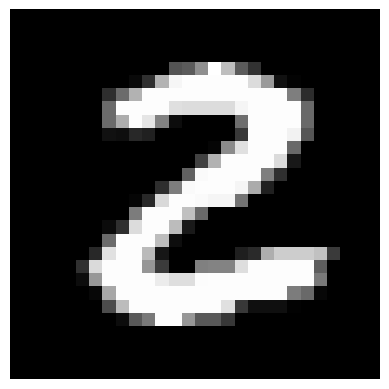

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 讀取檔案（請換成你自己的路徑）
df = pd.read_csv("hw2_handdigits.csv")

X = df.to_numpy()



image = X[1001,:].reshape(28,28)
plt.imshow(image , cmap='gray')
plt.axis('off')
plt.show()


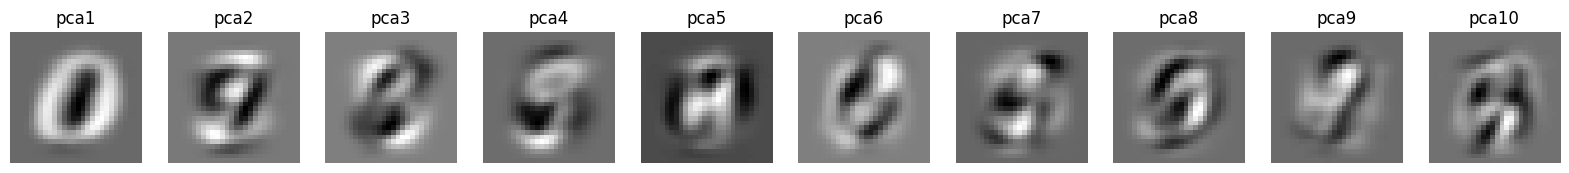

In [3]:
from sklearn.decomposition import PCA
X_mean = X.mean(axis=0)

# 2. 中心化
X_centered = X - X_mean

# 3. 对中心化后的数据进行 PCA
# pca = PCA(n_components=None)
# X_now = pca.fit(X_centered)
pca = PCA(n_components=None)
X_now = pca.fit(X)

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i , ax  in enumerate(axes):
    ax.imshow(X_now.components_[i].reshape(28,28) , cmap = 'gray')
    ax.set_title(f'pca{i+1}')
    ax.axis('off')
plt.show()


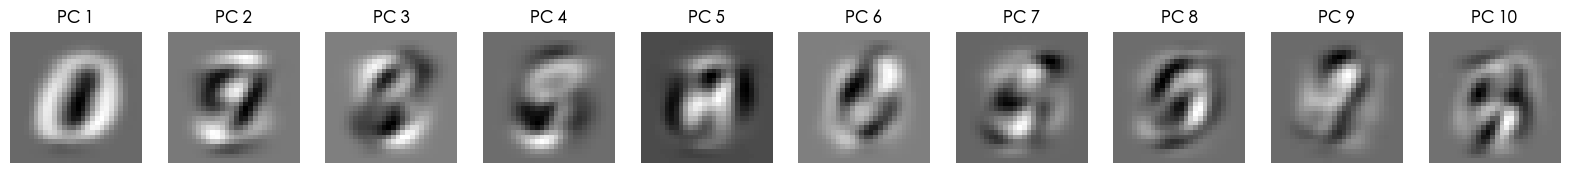

PC 1 解釋變異量: 0.0997  (9.97%)
PC 2 解釋變異量: 0.0707  (7.07%)
PC 3 解釋變異量: 0.0618  (6.18%)
PC 4 解釋變異量: 0.0547  (5.47%)
PC 5 解釋變異量: 0.0478  (4.78%)
PC 6 解釋變異量: 0.0437  (4.37%)
PC 7 解釋變異量: 0.0326  (3.26%)
PC 8 解釋變異量: 0.0293  (2.93%)
PC 9 解釋變異量: 0.0279  (2.79%)
PC 10 解釋變異量: 0.0232  (2.32%)
PC 1 累積解釋量: 0.0997  (9.97%)
PC 2 累積解釋量: 0.1705  (17.05%)
PC 3 累積解釋量: 0.2323  (23.23%)
PC 4 累積解釋量: 0.2871  (28.71%)
PC 5 累積解釋量: 0.3348  (33.48%)
PC 6 累積解釋量: 0.3785  (37.85%)
PC 7 累積解釋量: 0.4112  (41.12%)
PC 8 累積解釋量: 0.4405  (44.05%)
PC 9 累積解釋量: 0.4684  (46.84%)
PC 10 累積解釋量: 0.4916  (49.16%)


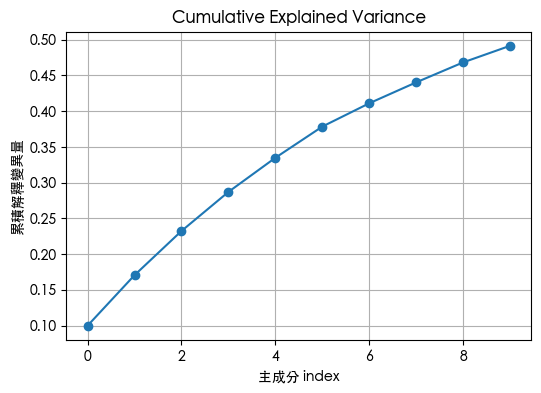

In [87]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=None)
X_now = pca.fit(X)

# 顯示前 10 個 PCA component
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_now.components_[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'PC {i+1}')
    ax.axis('off')
plt.show()

# 解釋變異量

explained = pca.explained_variance_ratio_

# print(explained.shape)

for i in range(10):
    print(f"PC {i+1} 解釋變異量: {explained[i]:.4f}  ({explained[i]*100:.2f}%)")
# 累積解釋變異量
cum = np.cumsum(explained)

for i in range(10):
    print(f"PC {i+1} 累積解釋量: {cum[i]:.4f}  ({cum[i]*100:.2f}%)")

plt.figure(figsize=(6,4))
plt.plot(cum[:10], marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("主成分 index")
plt.ylabel("累積解釋變異量")
plt.grid(True)
plt.show()



In [138]:
print(cum)

[0.09974841 0.17047406 0.23232213 0.28706521 0.3348439  0.37851951
 0.41115577 0.44045092 0.46839569 0.49164411 0.51259946 0.53313779
 0.5501742  0.56695643 0.58330203 0.5987808  0.61168055 0.62436427
 0.63606563 0.64759931 0.65804243 0.66817197 0.67770466 0.68704451
 0.6957548  0.70422302 0.71216912 0.71995978 0.72720676 0.73406644
 0.7406574  0.74699601 0.75295345 0.75890263 0.764501   0.76982106
 0.77498545 0.77986581 0.78463497 0.78936958 0.79393302 0.79816881
 0.8023071  0.80638176 0.81012794 0.81375382 0.81728386 0.82076188
 0.82407346 0.8273304  0.83056603 0.83376141 0.83673862 0.83960943
 0.84243539 0.84515574 0.84782867 0.85037009 0.85290106 0.8553741
 0.8577821  0.86012861 0.86238611 0.86460028 0.86670729 0.86875877
 0.87079425 0.87276564 0.87469108 0.87658329 0.87841902 0.88017523
 0.881916   0.88360527 0.88525964 0.88686    0.88843796 0.88998264
 0.89143758 0.8928693  0.89427152 0.89565983 0.89702194 0.89837855
 0.89971291 0.90100056 0.90227655 0.90350611 0.90472437 0.90592

- 可以發現可以解釋的量其實也偏少但這也很正常，因為我是從七百多維度變成五維度

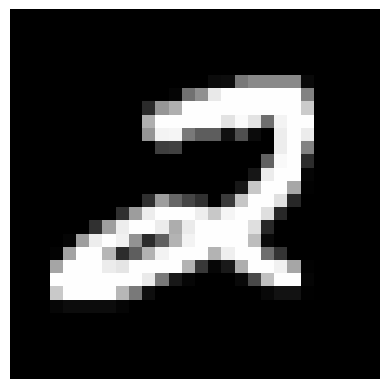

In [88]:
image = X[1136,:].reshape(28,28)
plt.imshow(image , cmap='gray')
plt.axis('off')
plt.show()

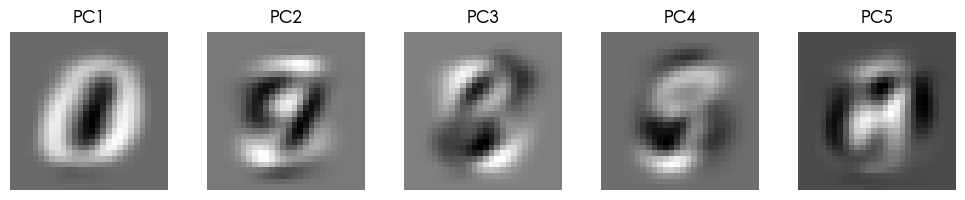

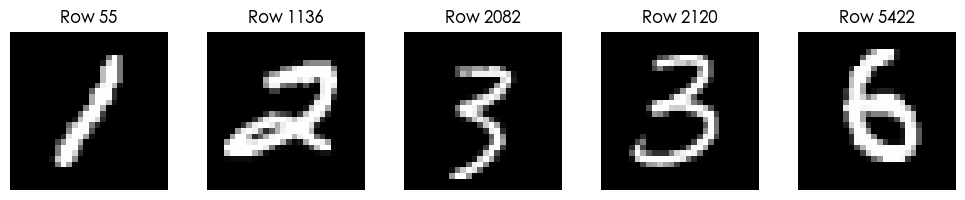

             PC1         PC2         PC3         PC4         PC5
55   -845.756202  718.273579 -122.560099 -282.867050  -45.223055
1136  518.608294 -121.967783 -768.931464 -442.062885  127.128788
2082 -570.531606  161.954231  315.551284  396.903650 -122.920627
2120   55.362877  779.538969  280.822532  196.033366 -202.130975
5422  354.183155  151.064338  581.502712 -613.191446  502.893762


In [89]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 指定要看的 row index
rows = [55, 1136, 2082, 2120, 5422]


# PCA 前五主成分
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# 取出對應的 PCA 係數（PC1~PC5）
subset = X_pca[rows, :5]

# 顯示前五個主成分長相
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'PC{i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# 顯示指定的五張原始影像
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    idx = rows[i]
    ax.imshow(X[idx, :].reshape(28, 28), cmap='gray')
    ax.set_title(f'Row {idx}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# 建立係數表
df_pca = pd.DataFrame(subset, index=rows, columns=[f'PC{i+1}' for i in range(5)])
print(df_pca)


* 黑色的部分是負的
* 白色的部分是正的

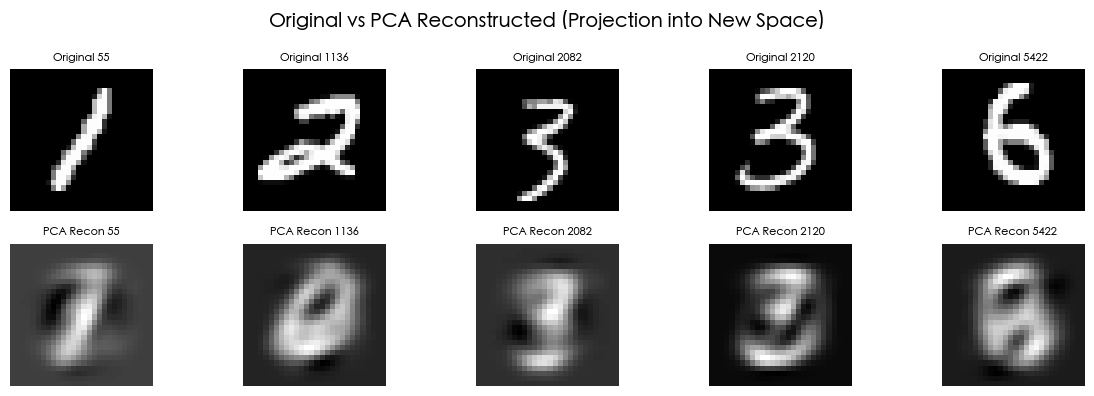

In [90]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

rows = [55, 1136, 2082, 2120, 5422]

# PCA：取前 5 個成分
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# 重構影像（投影回原空間）
X_reconstructed = pca.inverse_transform(X_pca)

# 顯示原圖 vs PCA 重構後的圖（新空間長相）
fig, axes = plt.subplots(2, 5, figsize=(12, 4))

for i, r in enumerate(rows):
    # 原始影像
    axes[0, i].imshow(X[r].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'Original {r}', fontsize=8)
    axes[0, i].axis('off')

    # 在 PCA 子空間恢復後的影像（新空間長相）
    axes[1, i].imshow(X_reconstructed[r].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'PCA Recon {r}', fontsize=8)
    axes[1, i].axis('off')

plt.suptitle("Original vs PCA Reconstructed (Projection into New Space)", fontsize=14)
plt.tight_layout()
plt.show()


- 感覺不太好，主要是主成分也選得少


=== PCA with 5 components ===


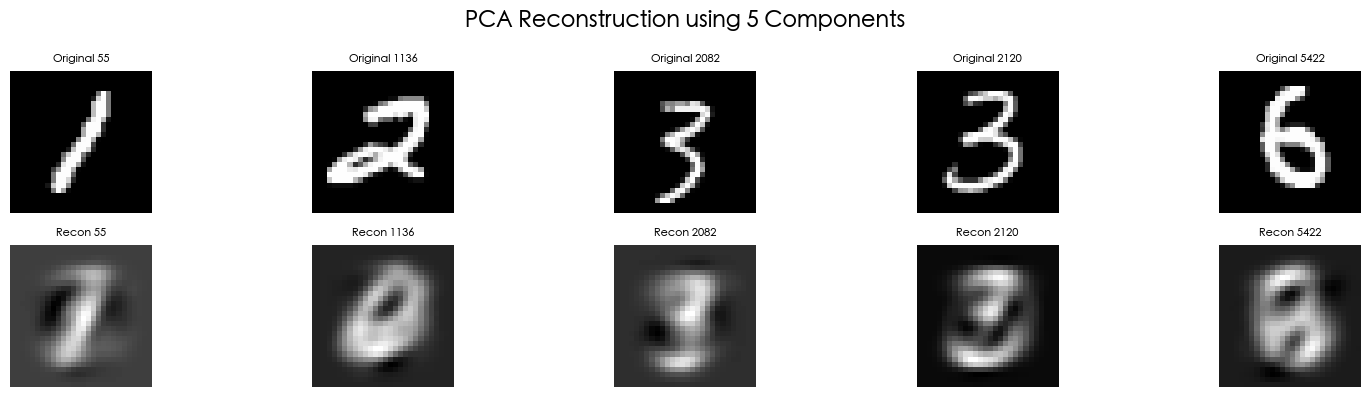


=== PCA with 50 components ===


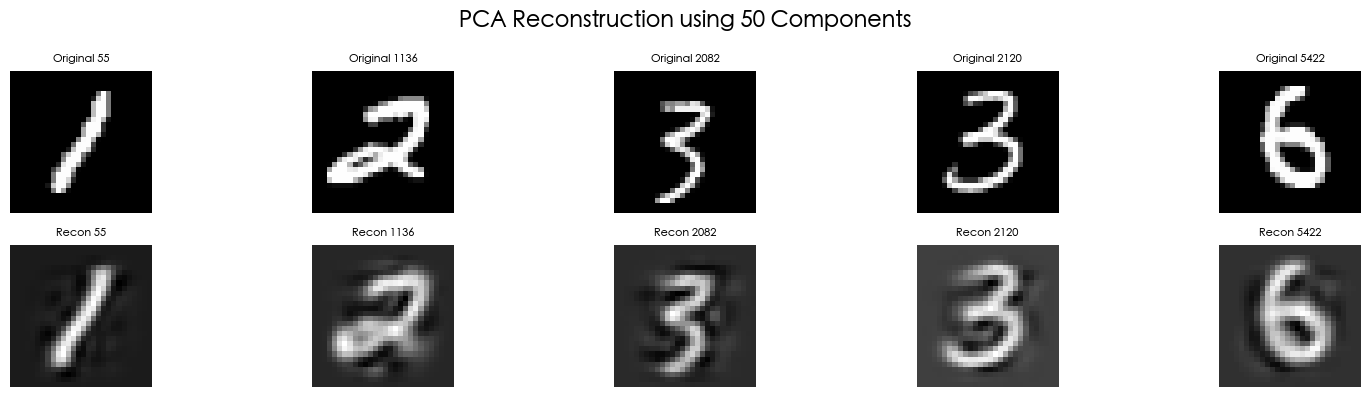


=== PCA with 100 components ===


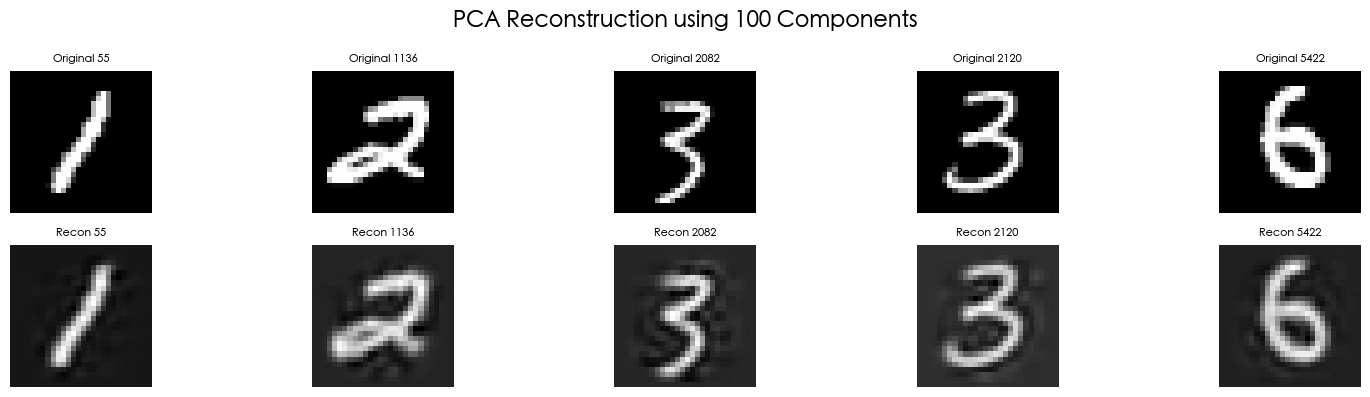


=== PCA with 300 components ===


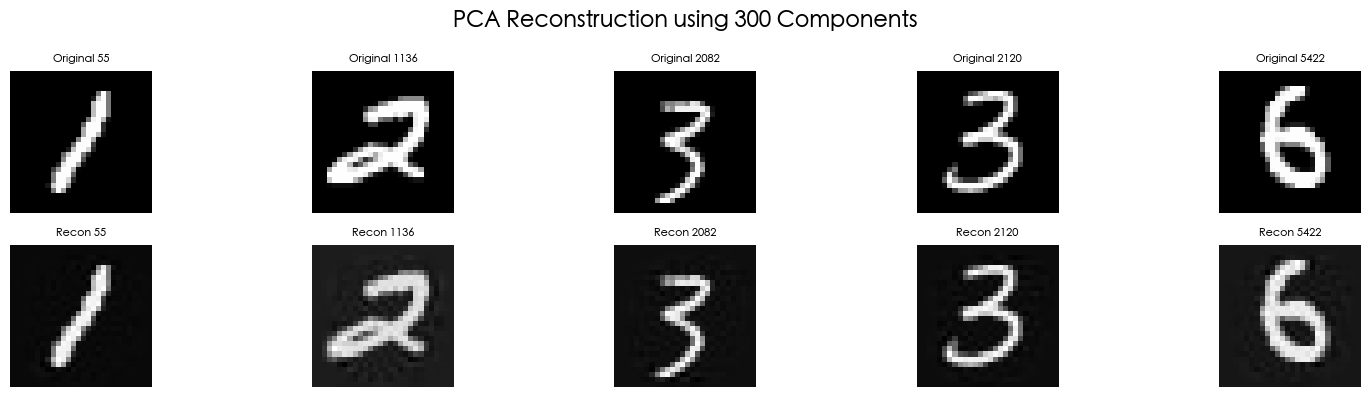

In [91]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

rows = [55, 1136, 2082, 2120, 5422]

# 想比較的 PCA 主成分數
components_list = [5, 50, 100, 300]

for n in components_list:
    print(f"\n=== PCA with {n} components ===")

    # PCA：取 n 個成分
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)

    # 重構影像（投影回原空間）
    X_reconstructed = pca.inverse_transform(X_pca)

    # 顯示原圖 vs PCA 重構後的圖
    fig, axes = plt.subplots(2, len(rows), figsize=(16, 4))

    for i, r in enumerate(rows):

        # 原始影像
        axes[0, i].imshow(X[r].reshape(28, 28), cmap='gray')
        axes[0, i].set_title(f'Original {r}', fontsize=8)
        axes[0, i].axis('off')

        # 重構影像
        axes[1, i].imshow(X_reconstructed[r].reshape(28, 28), cmap='gray')
        axes[1, i].set_title(f'Recon {r}', fontsize=8)
        axes[1, i].axis('off')

    plt.suptitle(f"PCA Reconstruction using {n} Components", fontsize=16)
    plt.tight_layout()
    plt.show()


- 這邊我有選取比較多一點的主成份看看，確實效果好了不少
<hr>

 <font color=pink>使用 NMF 擷取特徵（基底）</font>:
- a. 設定特徵（基底）數為 25。任選十個特徵（基底），畫出這些特徵。
注意：你必須先檢查 relative error 的趨勢，確認你得到的特徵滿足了
你所定義的收斂條件。
- b. 觀察 2a. 中的 NMF 基底與 1a. 中的 PCA 主成分，在外觀與結構上
的不同，以此說明他們在呈現資料的「組成方式」上有何差異。
- c. 針對 2b. 中觀察到的差異，請說明造成這些差異的關鍵因素。換句話
說，NMF 與 PCA 在設定或限制條件上有哪些不同？這些差異如何導
致 2b. 所看到的現象？
- d. 在 1a. 中我請你畫出前十個主成分，但在 2a. 中我請你畫出任選十個
特徵，而不是前十特徵。請你推測，這是因為我想要向你強調 PCA 與
NMF 所找出的特徵組在哪一個性質上的差異？

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 讀取檔案（請換成你自己的路徑）
df = pd.read_csv("hw2_handdigits.csv")

X = df.to_numpy()

# X  = X / 255


- $\text{relative\_error} = \frac{|\text{measured} - \text{real}|}{\text{real}}$

now seed:3
now seed:10
now seed:21
now seed:42


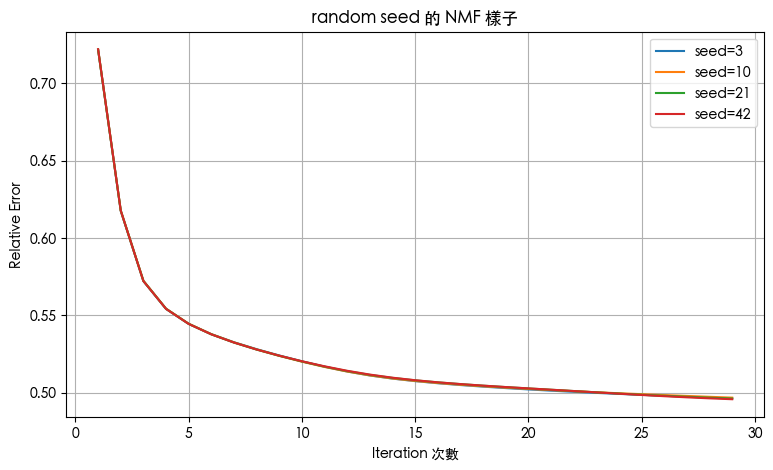

最佳 random seed: 42
最小 relative error: 0.49570405523248956


In [65]:
from sklearn.decomposition import NMF
from sklearn.exceptions import ConvergenceWarning
import numpy as np
import matplotlib.pyplot as plt
import warnings


plt.rcParams['font.family'] = 'Heiti TC'  # 或 'Heiti TC'
plt.rcParams['axes.unicode_minus'] = False   # 解決負號顯示成方框

# 忽略警告
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

times = 30
# 記錄結果
results = {}
#指派給他不同random seed 因為有可能是local max
seeds = [3 , 10 , 21 , 42]

# 嘗試多個 random seed
for seed in seeds:
    print(f'now seed:{seed}')
    errors = []
    for i in range(1, times):
        # print(i)
        nmf = NMF(n_components=25, max_iter=i, random_state=seed)
        nmf.fit(X)
        # np.linalg.norm(X, 'fro') 總量
        rel_error = nmf.reconstruction_err_ / np.linalg.norm(X, 'fro')
        errors.append(rel_error)
    results[seed] = errors

# 繪圖比較
plt.figure(figsize=(9, 5))
for seed, errs in results.items():
    plt.plot(range(1, times), errs, label=f'seed={seed}')
plt.xlabel('Iteration 次數')
plt.ylabel('Relative Error')
plt.title('random seed 的 NMF 樣子')
plt.legend()
plt.grid(True)
plt.show()

# 找出最好的 seed（誤差最低）
final_errors = {seed: errs[-1] for seed, errs in results.items()}
best_seed = min(final_errors, key=final_errors.get)
print("最佳 random seed:", best_seed)
print("最小 relative error:", final_errors[best_seed])


- 這樣看起來偏大，但感覺還可以接受因為數字本身的差距是大的，並非像人臉是由一個共同的結構一起寫出來的

- 這邊可以試試看單純拿一種數字來看看 因為上面我是全部來做 按理來說單純某一個數字的誤差應該要會變低很多

- 我下面先選擇1來實作看看

In [66]:
print(X.shape)  # 印出資料形狀確認
# 取出前 100 筆資料
X_TEST = X[:999, :]

(9999, 784)


now seed:3
now seed:10
now seed:21
now seed:42


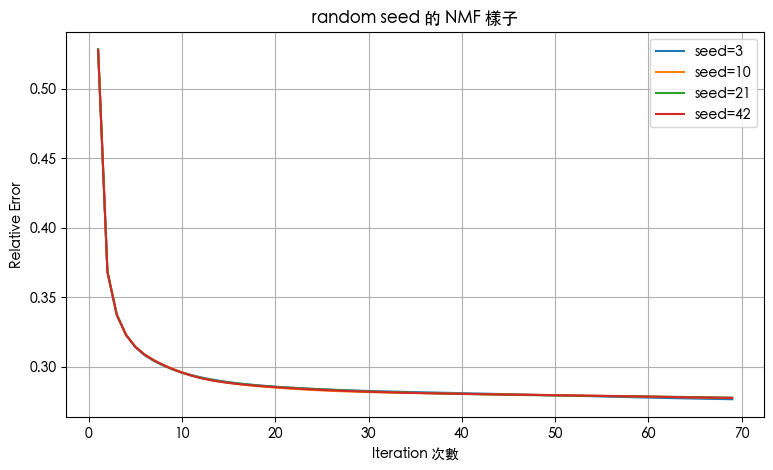

最佳 random seed: 3
最小 relative error: 0.27671098146631284


In [67]:
# 忽略警告
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

times = 70
# 記錄結果
results = {}
#指派給他不同random seed 因為有可能是local max
seeds = [3 , 10 , 21 , 42]

# 嘗試多個 random seed
for seed in seeds:
    print(f'now seed:{seed}')
    errors = []
    for i in range(1, times):
        # print(i)
        nmf = NMF(n_components=25, max_iter=i, random_state=seed)
        nmf.fit(X_TEST)
        # np.linalg.norm(X, 'fro') 總量
        rel_error = nmf.reconstruction_err_ / np.linalg.norm(X_TEST, 'fro')
        errors.append(rel_error)
    results[seed] = errors

# 繪圖比較
plt.figure(figsize=(9, 5))
for seed, errs in results.items():
    plt.plot(range(1, times), errs, label=f'seed={seed}')
plt.xlabel('Iteration 次數')
plt.ylabel('Relative Error')
plt.title('random seed 的 NMF 樣子')
plt.legend()
plt.grid(True)
plt.show()

# 找出最好的 seed（誤差最低）
final_errors = {seed: errs[-1] for seed, errs in results.items()}
best_seed = min(final_errors, key=final_errors.get)
print("最佳 random seed:", best_seed)
print("最小 relative error:", final_errors[best_seed])


- 這邊就可以看出來其實假如單純一種數字例如:1(或其他的都可以), relative error會差蠻多的
- 從這邊其實可以想像人臉的data誤差應該會更低一點

<hr>


- 所以我下面就直接用42來做 , 但其實這邊都感覺沒差很多

In [68]:
from sklearn.decomposition import NMF
i = 200
nmf = NMF(n_components=25, init='nndsvda' , random_state=42 ,tol=1e-5 )#這邊可能要再想一下是因為他是透過gradient desecnd 所以有可能是local
nmf.fit(X)
W = nmf.fit_transform(X) #是由哪一些參數所組成的
H = nmf.components_ #在新空間中不改變的那一些
rel_error = nmf.reconstruction_err_ / np.linalg.norm(X, 'fro')
print(f'{rel_error}')

0.48587916014520827


- 可以看出誤差偏高

X = W * H
- Ｈ 為基底
- W  為係數

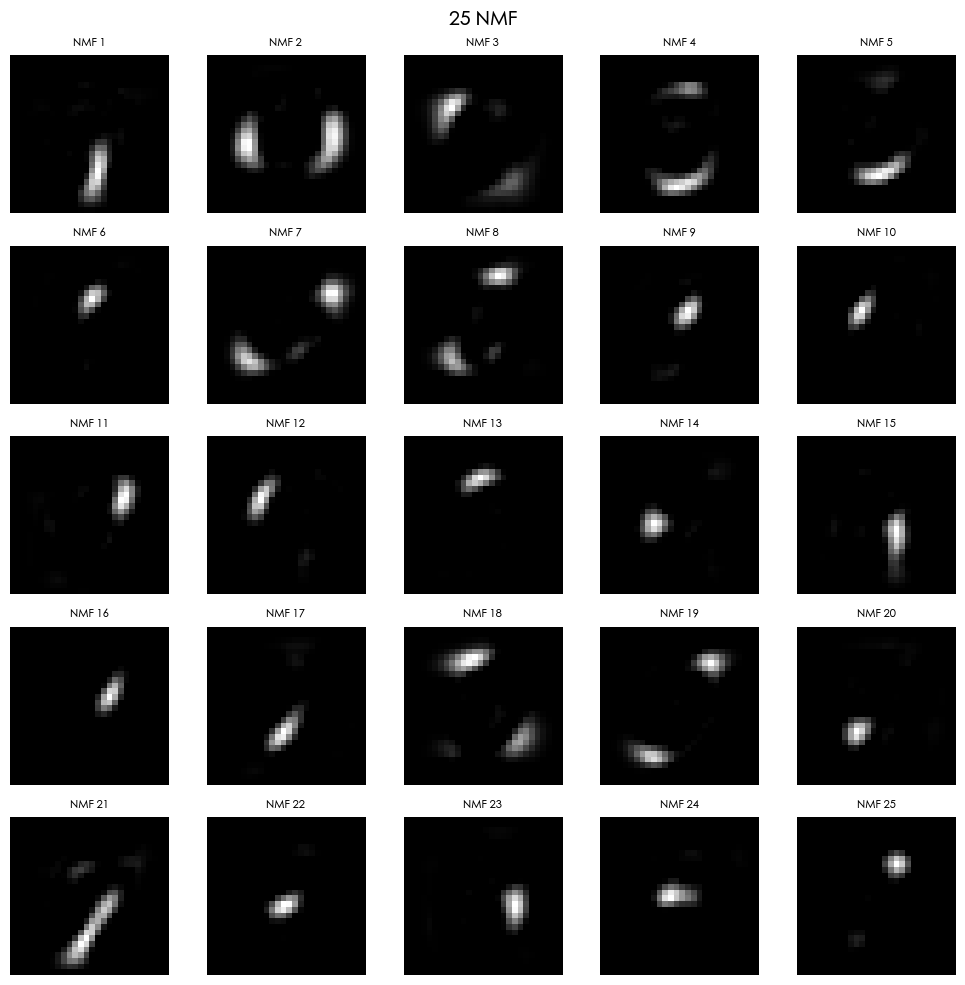

In [69]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()  # 攤平成一維，方便迴圈

for i in range(25):
    axes[i].imshow(H[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'NMF {i+1}', fontsize=8)
    axes[i].axis('off')

plt.suptitle('25 NMF', fontsize=14)
plt.tight_layout()
plt.show()


- 雖然只需要選10個 但我覺得我想要先看看所有的部分
- 我會想選以下的
- 3: 像是6 9數字會有的部分
- 8: 像是6 2 3 會有的部分
- 10: 4 5 7有的部分
- 12: 有圓圈的應該都有這些
- 13: 有圓圈的應該都有這些
- 15: 像是 4 5會有的東西
- 17: 有圓圈的應該都有這些
- 21: 6 1有的部分
- 24: 3 5 6有的
- 25： 6 8 9 有的
- 但其實上面也是我猜的我也不太確定是不是
- 所以可以在下面各選一個看看他的組成

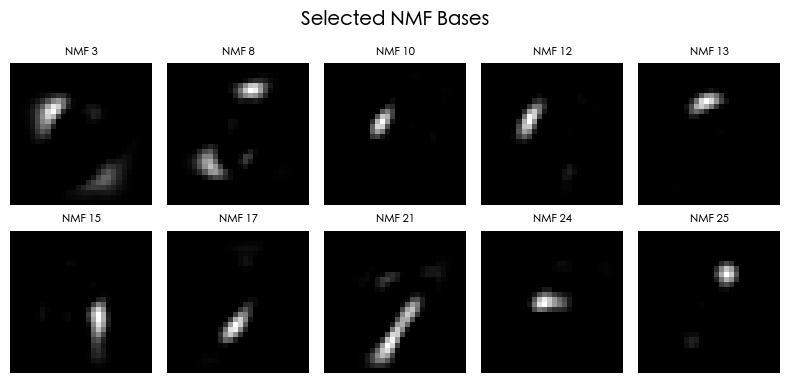

In [70]:
import matplotlib.pyplot as plt

selected = [3, 8, 10, 12, 13, 15, 17, 21, 24, 25]
selected = [i - 1 for i in selected]  # Python index 從 0 開始

# 10 張圖所以要用2x5排版
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
axes = axes.ravel()

for idx, comp in enumerate(selected):
    axes[idx].imshow(H[comp].reshape(28, 28), cmap='gray')
    axes[idx].set_title(f'NMF {comp+1}', fontsize=8)
    axes[idx].axis('off')

plt.suptitle('Selected NMF Bases', fontsize=14)
plt.tight_layout()
plt.show()


- 從各類選出一張來套入我所選擇的

In [71]:
photo = []
for i in range(1, 11):
    count = 990 * i
    photo.append(count)
print(photo)


[990, 1980, 2970, 3960, 4950, 5940, 6930, 7920, 8910, 9900]


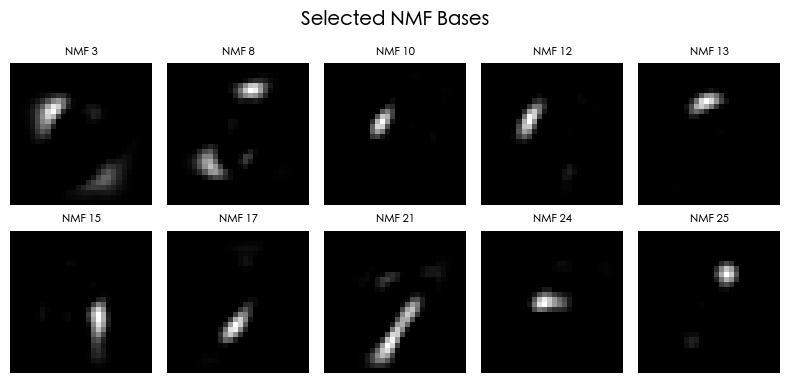

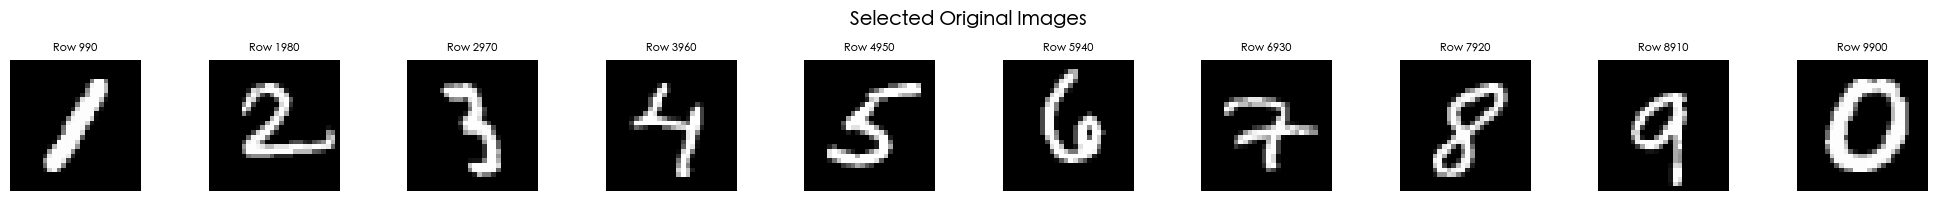


                   各影像在選定基底的 NMF 係數 
            NMF 3    NMF 8   NMF 10   NMF 12   NMF 13   NMF 15   NMF 17  \
Row 990   0.00003  0.01598  0.00000  0.00000  0.00000  0.00000  0.06564   
Row 1980  0.01887  0.00763  0.00000  0.00000  0.02837  0.01939  0.04380   
Row 2970  0.01055  0.00000  0.00000  0.00000  0.03991  0.08710  0.00000   
Row 3960  0.00192  0.00000  0.00961  0.09014  0.00967  0.07221  0.00000   
Row 4950  0.00000  0.01165  0.03013  0.00059  0.00327  0.03987  0.01663   
Row 5940  0.00000  0.00000  0.01142  0.07245  0.01554  0.05424  0.03499   
Row 6930  0.02323  0.00000  0.00000  0.00000  0.02051  0.00000  0.01026   
Row 7920  0.00000  0.00354  0.02985  0.00000  0.05134  0.00000  0.00926   
Row 8910  0.00000  0.00000  0.01573  0.05453  0.01821  0.06253  0.01571   
Row 9900  0.00000  0.02450  0.02026  0.08465  0.03981  0.00000  0.00000   

           NMF 21   NMF 24   NMF 25  
Row 990   0.00000  0.12331  0.16391  
Row 1980  0.00000  0.13911  0.04009  
Row 2970  0.00000  0.1

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

#1. 指定樣本與基底 
rows = photo  # 選的影像
selected = [3, 8, 10, 12, 13, 15, 17, 21, 24, 25]             
selected = [i - 1 for i in selected]                          

#2. 執行 NMF 
nmf = NMF(n_components=25, init='nndsvda', random_state=42, tol=1e-5)
W = nmf.fit_transform(X)
H = nmf.components_

# 10 張圖所以要用2x5排版
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
axes = axes.ravel()

for idx, comp in enumerate(selected):
    axes[idx].imshow(H[comp].reshape(28, 28), cmap='gray')
    axes[idx].set_title(f'NMF {comp+1}', fontsize=8)
    axes[idx].axis('off')

plt.suptitle('Selected NMF Bases', fontsize=14)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(rows), figsize=(20, 2))
for i, ax in enumerate(axes):
    idx = rows[i]
    ax.imshow(X[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f'Row {idx}', fontsize=8)
    ax.axis('off')
plt.suptitle('Selected Original Images', fontsize=14)
plt.tight_layout()
plt.show()


W_selected = W[rows][:, selected]

df_nmf = pd.DataFrame(
    W_selected,
    index=[f'Row {r}' for r in rows],
    columns=[f'NMF {s+1}' for s in selected]
)

print("\n                   各影像在選定基底的 NMF 係數 ")
print(df_nmf.round(5))


- 可以發現一個很酷的事情，他不會出現負的 ，這是由於ｎｍｆ的設定

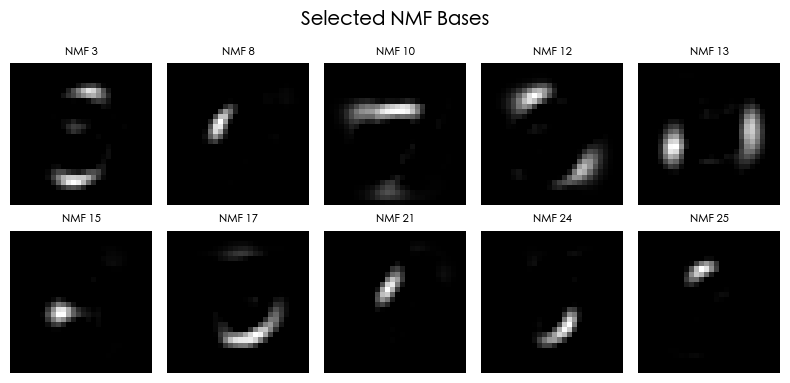

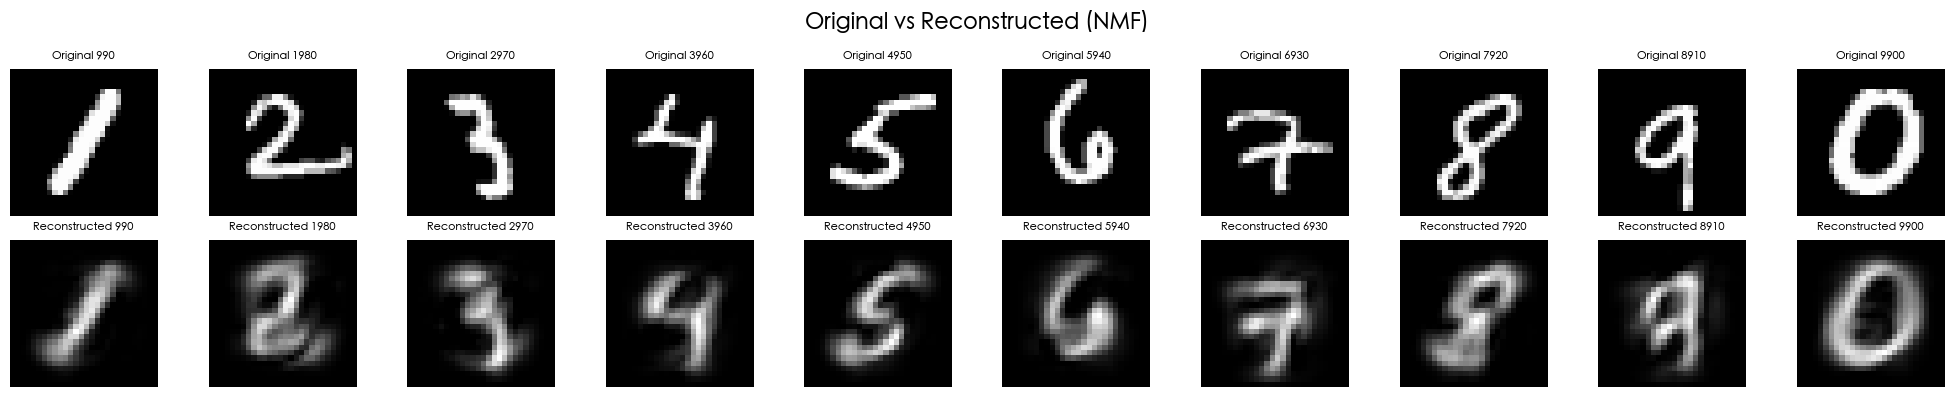


選定影像的重構誤差：
    Row  Relative Error
0   990         0.35192
1  1980         0.62374
2  2970         0.43532
3  3960         0.56253
4  4950         0.47003
5  5940         0.50479
6  6930         0.56424
7  7920         0.52974
8  8910         0.54978
9  9900         0.34803


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

#1. 指定樣本與基底 
rows = photo  # ← 你選的影像 index
selected = [3, 8, 10, 12, 13, 15, 17, 21, 24, 25]             
selected = [i - 1 for i in selected]  # 調整成 0-based

#2. 執行 NMF 
nmf = NMF(n_components=25, init='nndsvda', random_state=42, tol=1e-5)
W = nmf.fit_transform(X)
H = nmf.components_
reconstructed = np.dot(W, H)   # ★★★ 新增：重構影像 WH

# 3. 顯示選定的基底 H
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
axes = axes.ravel()
for idx, comp in enumerate(selected):
    axes[idx].imshow(H[comp].reshape(28, 28), cmap='gray')
    axes[idx].set_title(f'NMF {comp+1}', fontsize=8)
    axes[idx].axis('off')

plt.suptitle('Selected NMF Bases', fontsize=14)
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, len(rows), figsize=(20, 4))

for i, r in enumerate(rows):
    axes[0, i].imshow(X[r].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'Original {r}', fontsize=8)
    axes[0, i].axis('off')
    
    axes[1, i].imshow(reconstructed[r].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'Reconstructed {r}', fontsize=8)
    axes[1, i].axis('off')

plt.suptitle("Original vs Reconstructed (NMF)", fontsize=16)
plt.tight_layout()
plt.show()

errors = []
for i in range(X.shape[0]):
    num = np.linalg.norm(X[i] - reconstructed[i])
    den = np.linalg.norm(X[i])
    rel_err = num / den
    errors.append(rel_err)

df_selected_err = pd.DataFrame({
    'Row': rows,
    'Relative Error': [errors[r] for r in rows]
})

print("\n選定影像的重構誤差：")
print(df_selected_err.round(5))


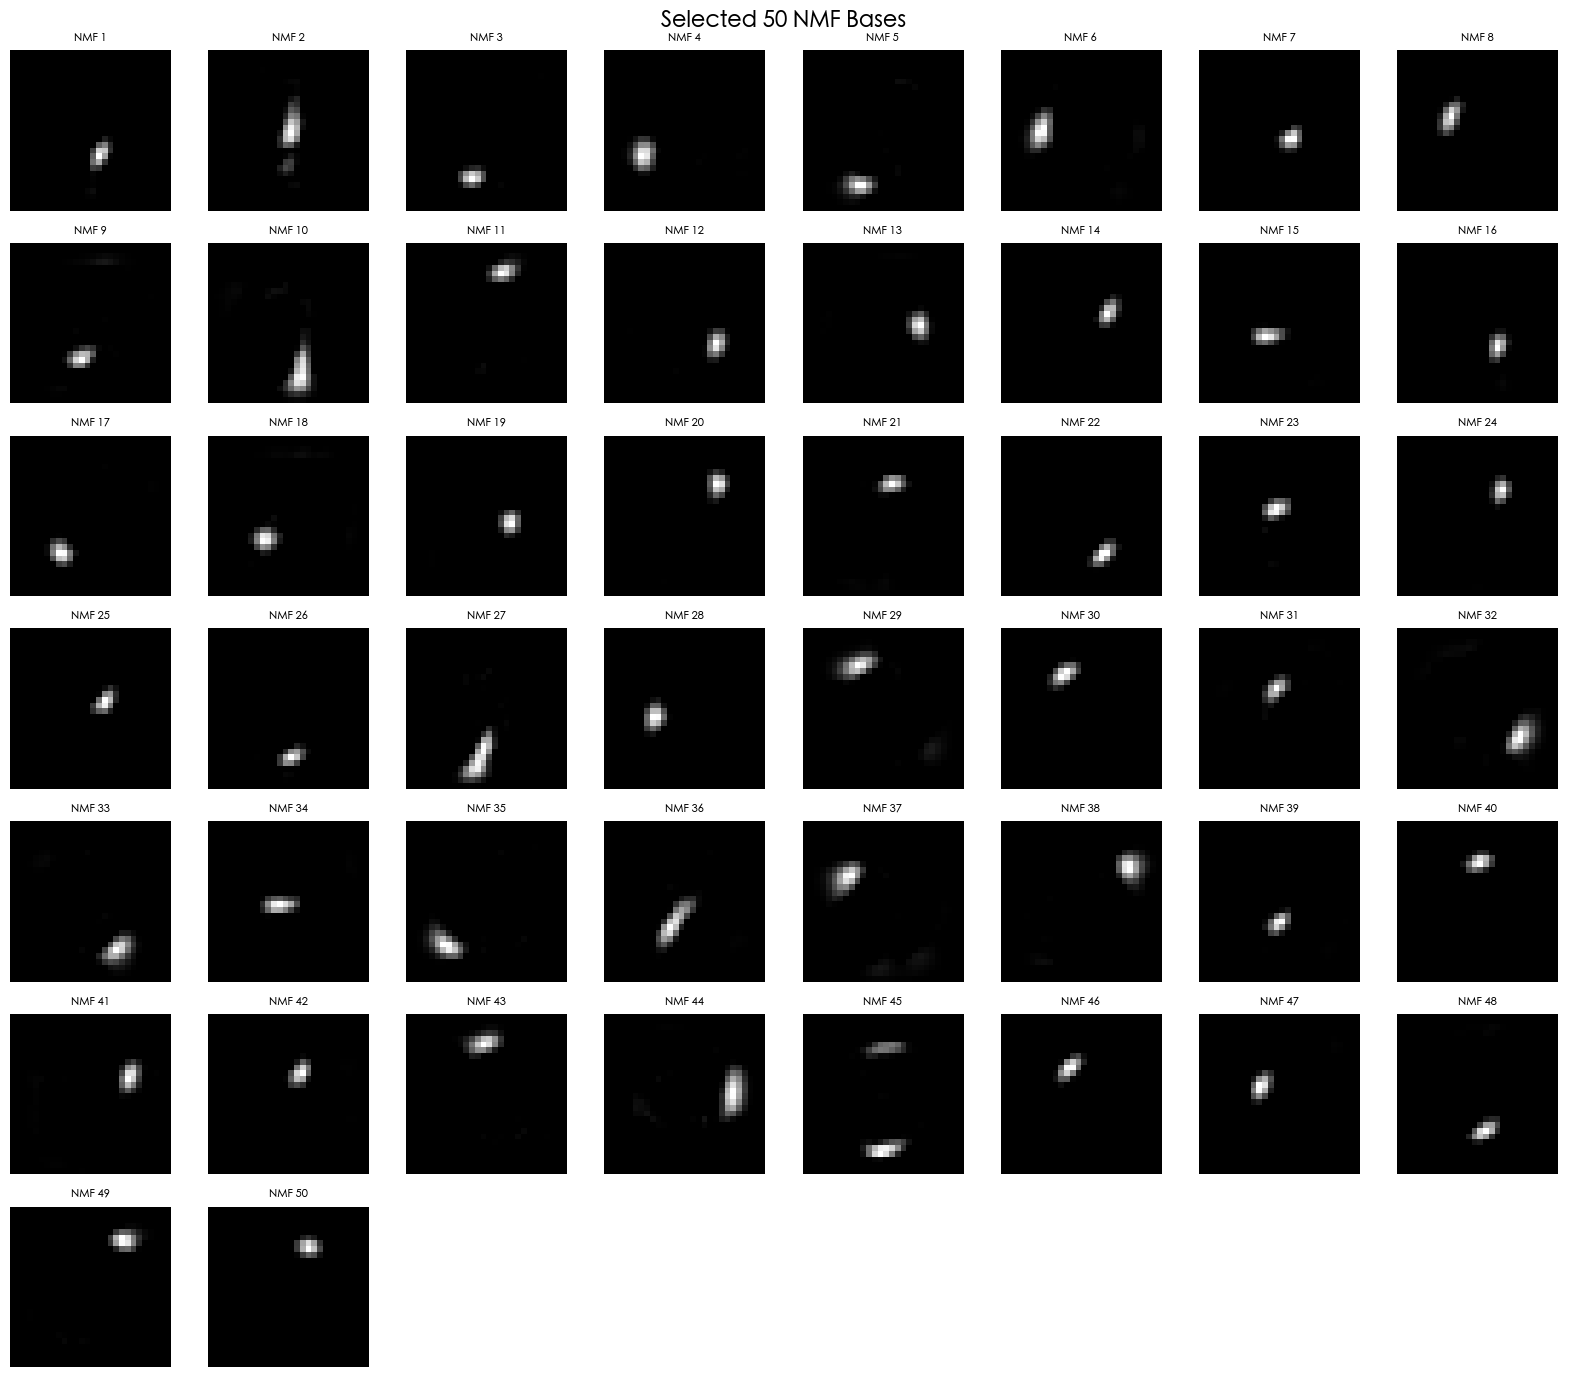

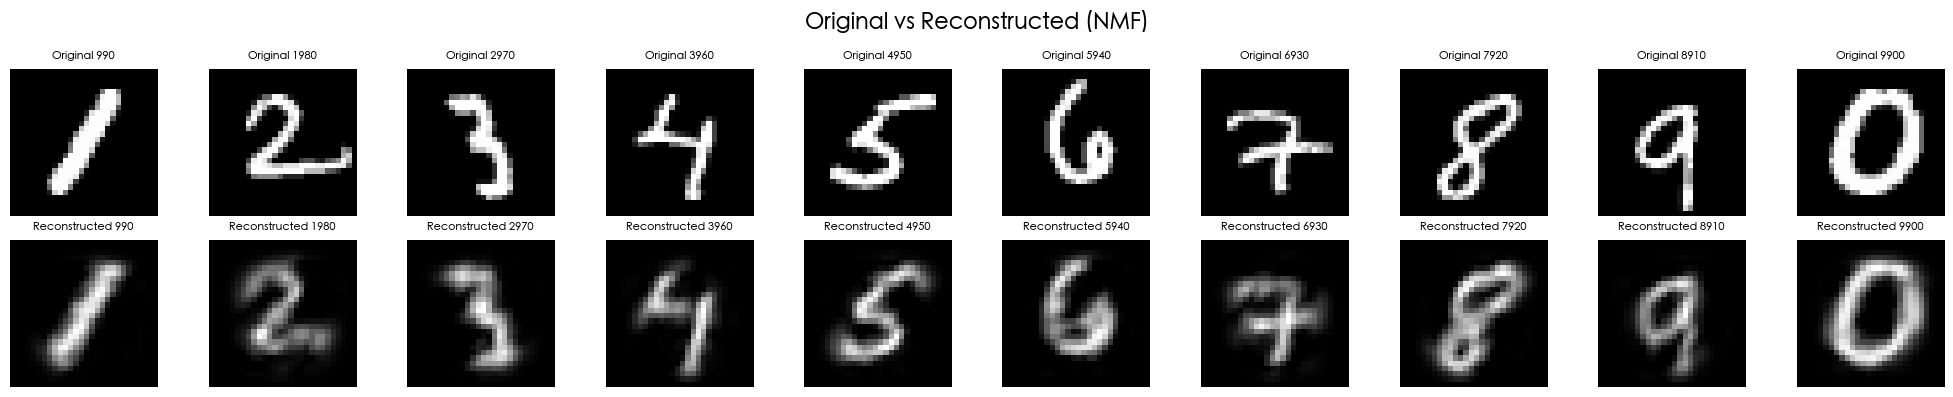

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF


NUMBER = 50          # 想要的 NMF components 數量
rows = photo         # 我選的影像 index

selected = list(range(NUMBER))


nmf = NMF(n_components=NUMBER, random_state=42, tol=1e-5)
W = nmf.fit_transform(X)
H = nmf.components_
reconstructed = np.dot(W, H)



# 自動決定排版：盡量接近方形
cols = int(np.ceil(np.sqrt(NUMBER)))
rows_base = int(np.ceil(NUMBER / cols))

fig, axes = plt.subplots(rows_base, cols, figsize=(cols * 2, rows_base * 2))
axes = axes.ravel()

for idx, comp in enumerate(selected):
    axes[idx].imshow(H[comp].reshape(28, 28), cmap='gray')
    axes[idx].set_title(f'NMF {comp+1}', fontsize=8)
    axes[idx].axis('off')

# 隱藏多餘 subplot
for j in range(NUMBER, len(axes)):
    axes[j].axis('off')

plt.suptitle(f'Selected {NUMBER} NMF Bases', fontsize=16)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, len(rows), figsize=(20, 4))

for i, r in enumerate(rows):
    axes[0, i].imshow(X[r].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'Original {r}', fontsize=8)
    axes[0, i].axis('off')
    
    axes[1, i].imshow(reconstructed[r].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'Reconstructed {r}', fontsize=8)
    axes[1, i].axis('off')

plt.suptitle("Original vs Reconstructed (NMF)", fontsize=16)
plt.tight_layout()
plt.show()



- 這邊效果感覺就好點，但是這是我選比較多的特徵值（50個）

- 然後我想要看看假如我選很高的n_component誤差按理來說會比較小(因為分的比較細緻，比較好重新總成原始數字)，就像上面這樣比較清楚

- 這下面是看看50的時候的誤差

now seed:3
now seed:10
now seed:21
now seed:42


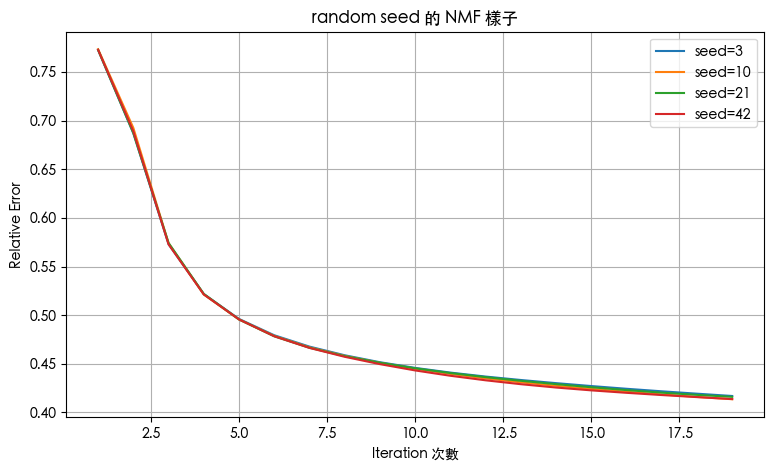

最佳 random seed: 10
最小 relative error: 0.41361821557089784


In [94]:
from sklearn.decomposition import NMF
from sklearn.exceptions import ConvergenceWarning
import numpy as np
import matplotlib.pyplot as plt
import warnings


plt.rcParams['font.family'] = 'Heiti TC'  # 或 'Heiti TC'
plt.rcParams['axes.unicode_minus'] = False   # 解決負號顯示成方框

# 忽略警告
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

Component_NUMBER = 50
times = 20
# 記錄結果
results = {}
#指派給他不同random seed 因為有可能是local max
seeds = [3 , 10 , 21 , 42]

# 嘗試多個 random seed
for seed in seeds:
    print(f'now seed:{seed}')
    errors = []
    for i in range(1, times):
        # print(i)
        nmf = NMF(n_components=Component_NUMBER, max_iter=i, random_state=seed)
        nmf.fit(X)
        # np.linalg.norm(X, 'fro') 總量
        rel_error = nmf.reconstruction_err_ / np.linalg.norm(X, 'fro')
        errors.append(rel_error)
    results[seed] = errors

# 繪圖比較
plt.figure(figsize=(9, 5))
for seed, errs in results.items():
    plt.plot(range(1, times), errs, label=f'seed={seed}')
plt.xlabel('Iteration 次數')
plt.ylabel('Relative Error')
plt.title('random seed 的 NMF 樣子')
plt.legend()
plt.grid(True)
plt.show()

# 找出最好的 seed（誤差最低）
final_errors = {seed: errs[-1] for seed, errs in results.items()}
best_seed = min(final_errors, key=final_errors.get)
print("最佳 random seed:", best_seed)
print("最小 relative error:", final_errors[best_seed])


- 確實是有下降但是還是挺高的

<hr>

##### b. 觀察 2a. 中的 NMF 基底與 1a. 中的 PCA 主成分，在外觀與結構上的不同，以此說明他們在呈現資料的「組成方式」上有何差異。

- 他們最大的差別在於ＰＣＡ會有負數但是ＮＭＦ最多只會等於零
- 在圖片上的呈現上PCA:-255~255 , NMF = 0~255
- 這在於某一些領域是必須的 也會比較好解釋 就如上課所說（例如：聲音應該要是加上去的）

##### c. 針對 2b. 中觀察到的差異，請說明造成這些差異的關鍵因素。換句話說，NMF 與 PCA 在設定或限制條件上有哪些不同？這些差異如何導致 2b. 所看到的現象？

- 可以從他們數學原理看出
- pca: 是要找變異最大量 但是他在各個係數中有可能有正有負
  
$$
\hat{X} = Z W_k^\top = X W_k W_k^\top
$$

- 但是在NMF中的組成是這樣的 一開始就有說他會是都是正的
- 但同時這有一個問題這只能用gradient desend的方式取得，可以說其實這是一個np問題
  
$$
\begin{aligned}
A &\approx WH \\
\\[-4pt]
\text{where} \quad 
W &\in \mathbb{R}_{+}^{m \times r}, \\
H &\in \mathbb{R}_{+}^{r \times n}.
\end{aligned}
$$

- 而在NMF中並非像ＰＣＡ一樣會從大排到小必須你自己去選

##### d. 在 1a. 中我請你畫出前十個主成分，但在 2a. 中我請你畫出任選十個特徵，而不是前十特徵。請你推測，這是因為我想要向你強調 PCA 與NMF 所找出的特徵組在哪一個性質上的差異？

- 這就像我上面說的他其實沒有排序的問題但是ＰＣＡ有但是ＮＭＦ沒有，所以你才必須自己去找

<hr>
<hr>

#### 使用 t-SNE 擷取特徵（投影維度）a. 將 t-SNE 之投影維度設為三維。這三個維度是否能像 PCA 的主成分與 NMF 的基底，對應到可視化的影像，如 1a. 與 2a. 的作法？若可以，請畫出這三個維度；若不可以，請說明原因

- perplexity 越小 → 更重視局部鄰近
- perplexity 越大 → 更重視全域結構

- 我先試試看2d的之後再看看3d的

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 讀取檔案（請換成你自己的路徑）
df = pd.read_csv("hw2_handdigits.csv")

X = df.to_numpy()


In [145]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42 , \
               perplexity=10 )

X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)



(9999, 2)


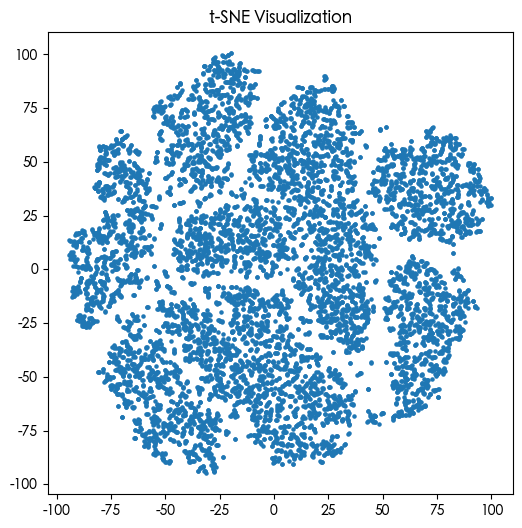

In [146]:
plt.figure(figsize=(6,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5)
plt.title("t-SNE Visualization")
plt.show()

- 雖然這邊看似可以用到2 3維 但是其實這是沒有意義的 因為我他完全沒辦法說明
- pca nmf 都是linear的而t-sne是非線性的 部會知道怎麼解釋也沒辦法畫出來

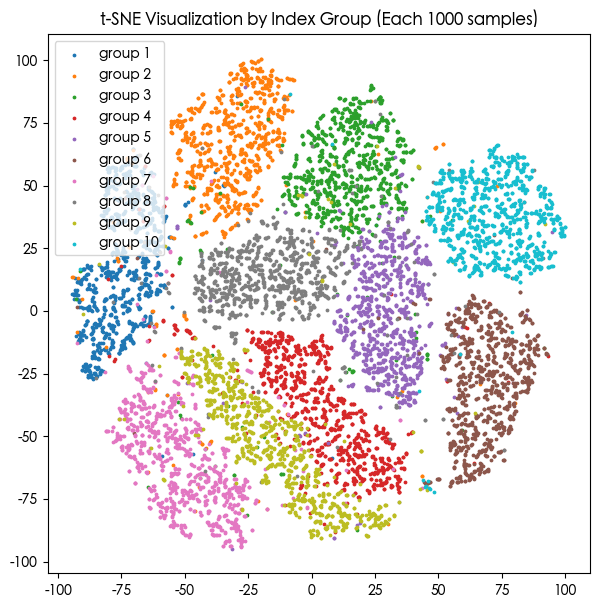

In [147]:
import numpy as np

# X_tsne 假設是 (10000, 2)
N = X_tsne.shape[0]

group = np.floor(np.arange(N) / 1000).astype(int)


plt.figure(figsize=(7,7))

for g in range(10):
    idx = (group == g)
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], s=3, label=f"group {g+1}")

plt.legend()
plt.title("t-SNE Visualization by Index Group (Each 1000 samples)")
plt.show()


<hr>

In [148]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42, perplexity=15)
X_tsne_3d = tsne.fit_transform(X)

print(X_tsne_3d.shape)  # (10000, 3)


N = X_tsne_3d.shape[0]
group = np.floor(np.arange(N) / 1000).astype(int)
# print(group)


(9999, 3)


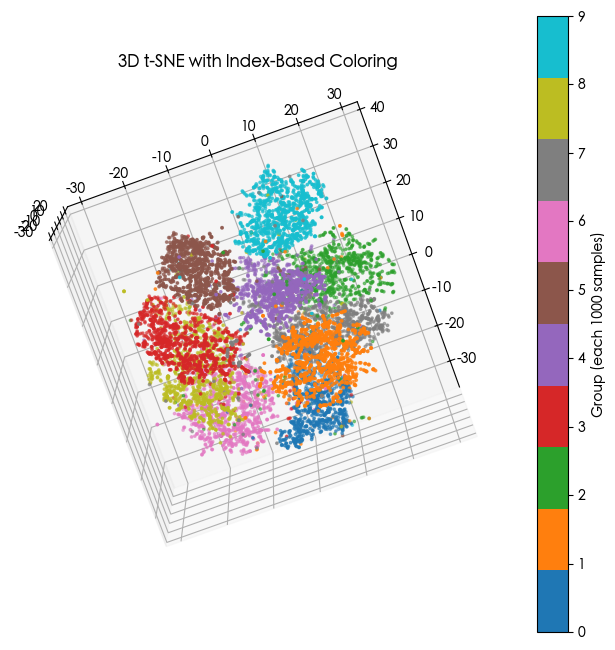

In [149]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = -80 , azim = 20 )

p = ax.scatter(

    X_tsne_3d[:,0],
    X_tsne_3d[:,1],
    X_tsne_3d[:,2],
    c = group,
    cmap="tab10",
    s = 3
)


fig.colorbar(p, ax=ax, label="Group (each 1000 samples)")
ax.set_title("3D t-SNE with Index-Based Coloring")
plt.show()


- 但這邊其實0 代表 1 , 9代表 0

<hr>
<hr>

#### Part II. 手寫數字影像降維與分群

 視覺三維特徵空間中的群聚分布

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 讀取檔案（請換成你自己的路徑）
df = pd.read_csv("hw2_handdigits.csv")

X = df.to_numpy()


In [134]:
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# --- PCA: 前三主成分 ---
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# --- NMF: 三個基底 ---
nmf = NMF(n_components=3, init='random', random_state=42)
X_nmf = nmf.fit_transform(X)

# --- t-SNE: 投影至三維 ---
tsne = TSNE(n_components=3, random_state=42, perplexity=15)
X_tsne = tsne.fit_transform(X)




Group 標籤種類: [0 1 2 3 4 5 6 7 8 9]


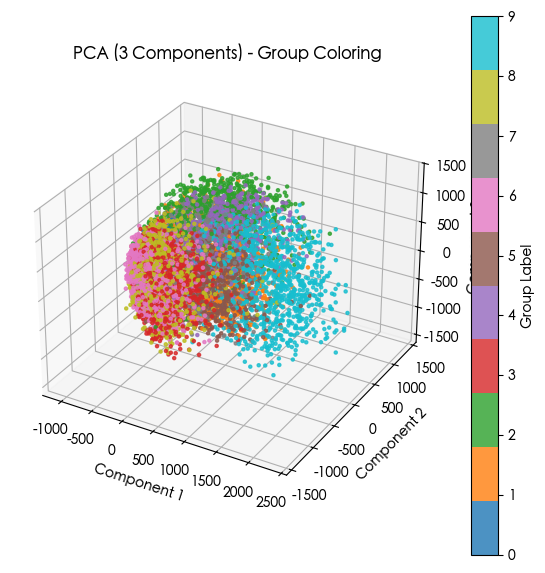

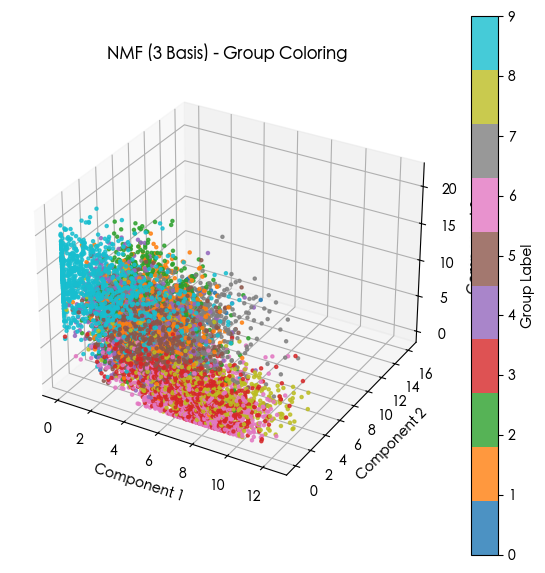

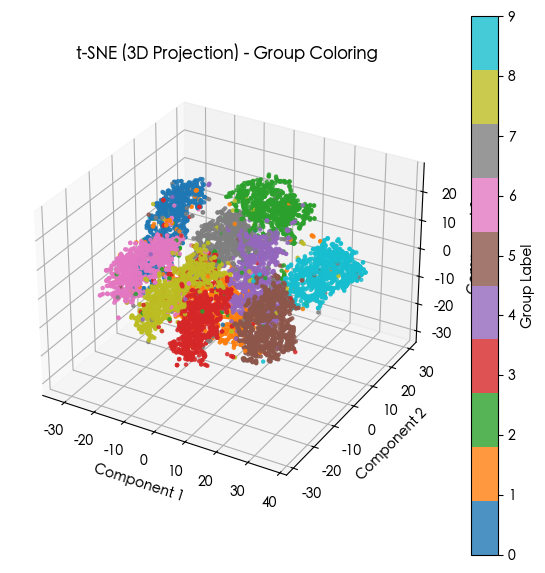

In [135]:
group = np.floor(np.arange(N) / 1000).astype(int)
print("Group 標籤種類:", np.unique(group))


def plot_3d(X_3d, labels, title):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')

    sc = ax.scatter(X_3d[:,0], X_3d[:,1], X_3d[:,2],
                    c=labels, cmap='tab10', s=5, alpha=0.8)

    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")

    plt.colorbar(sc, label="Group Label")
    plt.show()

plot_3d(X_pca,  group, "PCA (3 Components) - Group Coloring")
plot_3d(X_nmf,  group, "NMF (3 Basis) - Group Coloring")
plot_3d(X_tsne, group, "t-SNE (3D Projection) - Group Coloring")


- 這邊其實0 代表 1 , 9代表 0
- 感覺只有t-sne才有辦法好好把他們拆開來（n = 3的時候），畢竟前兩個是線性的

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=None)
X_pca = pca.fit(X)

explained = X_pca.explained_variance_ratio_

# 累積解釋變異量
cum = np.cumsum(explained)

for i in range(784):
    # print(f"PC {i+1} 累積解釋量: {cum[i]:.4f}  ({cum[i]*100:.2f}%)")
    if cum[i] >= 0.75:
        print(f'現在是第{i+1}個主成分')
        break




現在是第33個主成分


In [158]:
pca = PCA(n_components=50)
pca.fit(X)             # step 1：學習主成分
X_pca = pca.transform(X)  # step 2：投影到新空間

- 要取33個

In [ ]:
from sklearn.decomposition import NMF
import numpy as np
NUMBER = 50

# 這邊是NMF
nmf = NMF(n_components=NUMBER, init='nndsvda', random_state=42, tol=1e-5)
X_nmf = nmf.fit(X)
W = nmf.fit_transform(X)
H = nmf.components_
X_reconstructed = W @ H
nmf_error = np.linalg.norm(X - X_reconstructed, 'fro')**2

#這邊是ＰＣＡ
pca = PCA(n_components=33)
X_reduced = pca.fit_transform(X)
X_recon_pca = pca.inverse_transform(X_reduced)

pca_error = np.linalg.norm(X - X_recon_pca, 'fro')**2

print(f"NMF 重建誤差: {nmf_error:.2f}")
print(f"PCA 重建誤差 (75% 變異): {pca_error:.2f}")

NMF 重建誤差: 8462185497.55
PCA 重建誤差 (75% 變異): 8503126628.61


- 這樣可以看出算合理因為誤差比pca還小一點

<hr>

- T-sne

In [153]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components=3, random_state=42 , \
                perplexity=15 )

X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)  # (10000, 3)

(9999, 3)


- 對於原始資料

In [ ]:
from sklearn.cluster import KMeans

# X shape = (n_samples, n_features)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
# 這邊可以稍微看出來，是不是分類準確的 但只是稍微看看 
print(labels[310:360] , '\n')
print(labels[1300:1350] , '\n')
print(labels[2300:2350] , '\n')
print(labels[3300:3350], '\n')



[8 2 2 2 8 2 2 2 8 2 8 8 2 2 8 8 2 8 8 2 2 8 2 8 2 8 2 8 8 2 2 2 8 8 8 2 2
 2 8 8 8 8 2 2 2 2 2 8 8 8] 

[5 5 5 5 5 6 0 5 5 5 2 2 5 0 0 5 0 5 5 5 1 2 8 5 5 5 5 1 5 5 2 4 5 5 5 5 5
 5 5 5 1 5 5 5 5 2 5 5 5 5] 

[4 6 6 1 1 8 6 6 1 4 6 8 6 6 6 6 1 6 6 1 8 6 8 6 4 1 6 8 1 1 1 1 1 1 3 6 6
 8 1 1 8 1 6 1 4 4 8 6 6 1] 

[7 7 7 5 7 7 7 7 7 7 3 5 7 0 7 3 7 8 7 3 7 3 3 7 0 7 3 7 3 7 1 3 3 8 7 8 0
 7 7 3 7 3 0 7 3 3 3 0 7 3] 



- 這邊是對轉變基底後做的

In [184]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 例如取前 50 個主成分
pca = PCA(n_components=33)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)

labels_pca = kmeans.labels_


In [185]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans

nmf = NMF(n_components=NUMBER, init='nndsvda', random_state=42, tol=1e-5)
X_nmf = nmf.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_nmf)

labels_nmf = kmeans.labels_


In [189]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

X_tsne = TSNE(n_components=3, perplexity=30, random_state=0).fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_tsne)

labels_tsne = kmeans.labels_


- python中沒有外在指標，必須要自己來實際做

In [190]:
import numpy as np
from sklearn.metrics.cluster import contingency_matrix

def purity_score(y_true, y_pred):
    contingency = contingency_matrix(y_true, y_pred)
    return np.sum(np.max(contingency, axis=1)) / np.sum(contingency)

In [194]:
N = X.shape[0]
group = np.floor(np.arange(N) / 1000).astype(int)   # 0~9
print(group)
pur_original = purity_score(group, labels)
print("Purity =", pur_original)

purity_pca = purity_score(group, labels_pca)
print("PCA Purity =", purity_pca)

purity_nmf = purity_score(group, labels_nmf)
print("NMF Purity =", purity_nmf)

purity_tsne = purity_score(group, labels_tsne)
print("t-SNE Purity =", purity_tsne)



[0 0 0 ... 9 9 9]
Purity = 0.5533553355335533
PCA Purity = 0.5787578757875788
NMF Purity = 0.3266326632663266
t-SNE Purity = 0.8054805480548055


- 這邊可以發現nmf的效果特別差，但是上面來看他的重建誤差比PCA還低不確定是什麼問題

- 這邊的pca是我慢慢調才有的，不然他效果也沒這麼好

In [ ]:
from sklearn.metrics import silhouette_score

# 原始資料
sil_original = silhouette_score(X, labels)
print("Silhouette (original) =", sil_original)

# PCA
sil_pca = silhouette_score(X_pca, labels_pca)
print("Silhouette (PCA) =", sil_pca)

# NMF
sil_nmf = silhouette_score(X_nmf, labels_nmf)
print("Silhouette (NMF) =", sil_nmf)

# t-SNE
sil_tsne = silhouette_score(X_tsne, labels_tsne)
print("Silhouette (t-SNE) =", sil_tsne)


Silhouette (original) = 0.0532342529024288
Silhouette (PCA) = 0.09874538572259368
Silhouette (NMF) = 0.15787673573896852
Silhouette (t-SNE) = 0.3857988715171814


- 這邊ＮＭＦ所做的空間是很密的，我個人的理解是因為他是透過加上去的所以比較密，尤其是在pca中因為有正有負所以會導致比較稀松
- T-sne倒是很好理解畢竟他原本就是在比較這個

<hr>
<hr>

##### Part III. 動物類別分群與特徵類別分析

In [95]:
import pandas as pd
df_animal = pd.read_csv("hw2_data_animals.csv")
df_animal.head()

,動物名稱,禹晴,品薰,國展,彼得兔,婷妤,宥任,本豫,雅茹,宇昕,...,芷綾,鈞磊,唯翔,洧宏,宸妤,子欣,昀潼,詩偉,子玄,昱愷
0,Alligator 鱷魚,1,1,1,1,1,4,1,3,1,...,1,1,1,1,1,4,1,1,1,2
1,Bear 熊,2,2,2,2,2,4,2,1,1,...,2,2,2,2,2,1,2,1,2,1
2,Camel 駱駝,3,3,3,3,3,1,3,1,2,...,3,3,3,2,2,2,2,2,3,1
3,Cat 貓,4,4,4,4,4,5,2,1,3,...,4,4,4,2,2,2,3,3,4,1
4,Cheetah 印度豹,2,4,5,2,3,4,4,1,5,...,2,2,5,2,2,1,2,1,2,1


In [96]:
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects import pandas2ri
pandas2ri.activate()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False


ro.r("rm(list=ls())")

df = pd.read_csv("hw2_data_animals.csv")
ro.globalenv["df"] = pandas2ri.py2rpy(df)

r_code = """
if (!require(Gifi)) install.packages('Gifi')
library(Gifi)

animals <- df$動物名稱
X <- df[, -1]

for(i in 1:ncol(X)){ 
  X[,i] <- as.factor(X[,i])
}

print("R dataframe row count:")
print(nrow(df))

h <- homals(X, ndim=2)

animal_coord <- h$objscores
cat_list <- h$catscores
var_coord <- do.call(rbind, cat_list)
"""

ro.r(r_code)


# 3. 從 R 抓結果

animal_coord = np.array(ro.globalenv["animal_coord"])
var_coord    = np.array(ro.globalenv["var_coord"])
var_labels   = [str(x) for x in ro.r("rownames(var_coord)")]
animal_labels = [str(x) for x in ro.globalenv["animals"]]

print("animal_coord shape =", animal_coord.shape)
print("var_coord shape =", var_coord.shape)
print("number of animals =", len(animal_labels))


[1] "R dataframe row count:"
[1] 35
animal_coord shape = (35, 2)
var_coord shape = (144, 2)
number of animals = 35


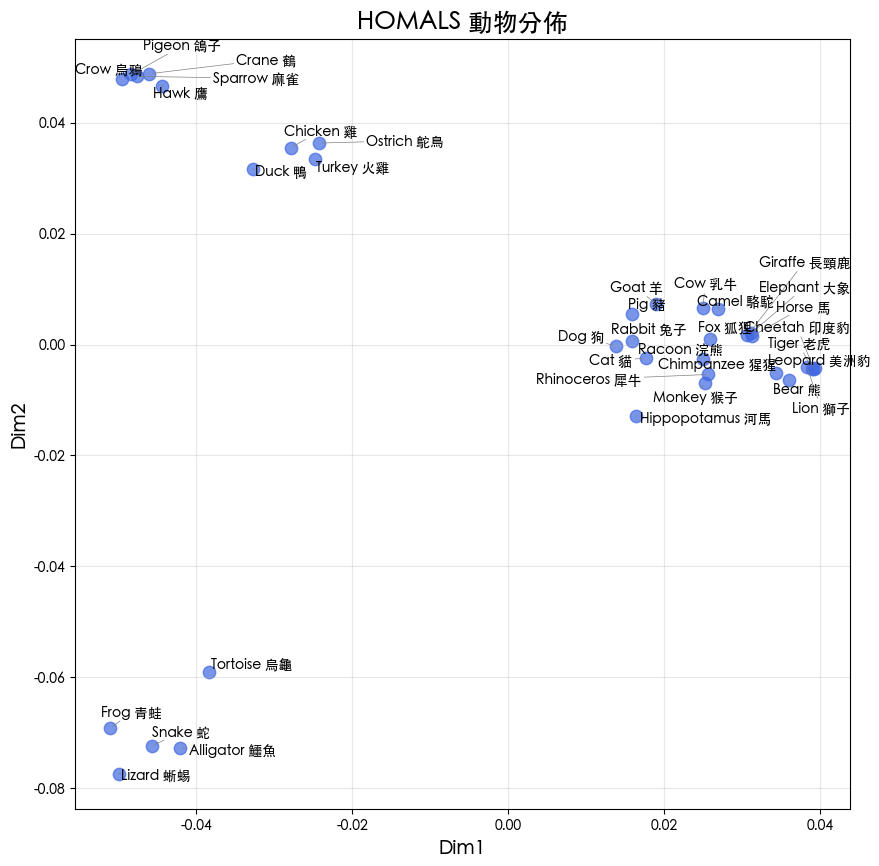

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from adjustText import adjust_text
import numpy as np



coords = animal_coord
labels = animal_labels

plt.figure(figsize=(10, 10))
plt.scatter(coords[:, 0], coords[:, 1], s=80, c='royalblue', alpha=0.7)

# 放文字並收集 text 物件以便自動調整
texts = []
for i, label in enumerate(labels):
    texts.append(
        plt.text(coords[i, 0], coords[i, 1], label,fontsize=10)
    )

# 自動調整避免重疊
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.title("HOMALS 動物分佈", fontsize=18)
plt.xlabel("Dim1", fontsize=14)
plt.ylabel("Dim2", fontsize=14)
plt.grid(alpha=0.3)

plt.show()


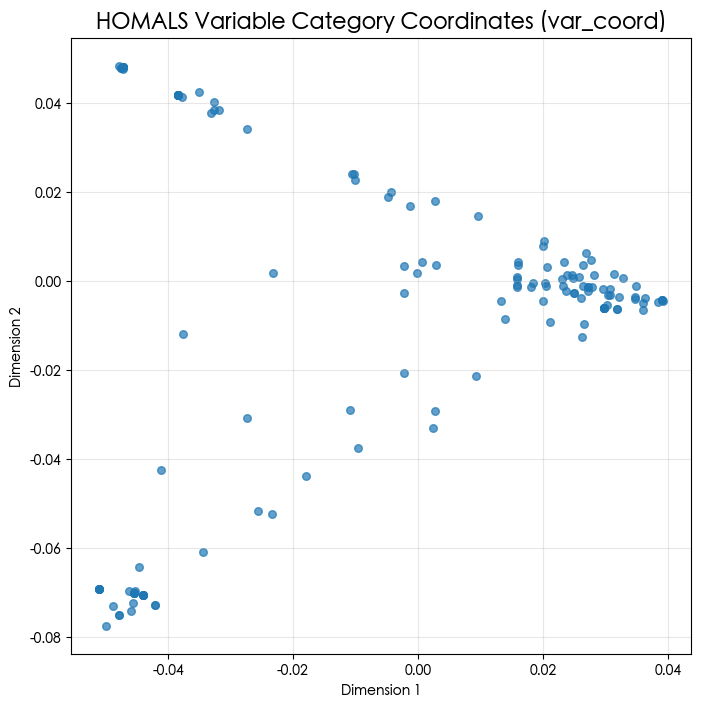

In [35]:
plt.figure(figsize=(8, 8))
plt.scatter(var_coord[:, 0], var_coord[:, 1], s=30, alpha=0.7)

plt.title("HOMALS Variable Category Coordinates (var_coord)", fontsize=16)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True, alpha=0.3)
plt.show()


/var/folders/7t/lv1vfzs91txg1j8rzt3p4y4r0000gn/T/ipykernel_56968/736656550.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', num_categories)  # 你可以選擇不同的 colormap


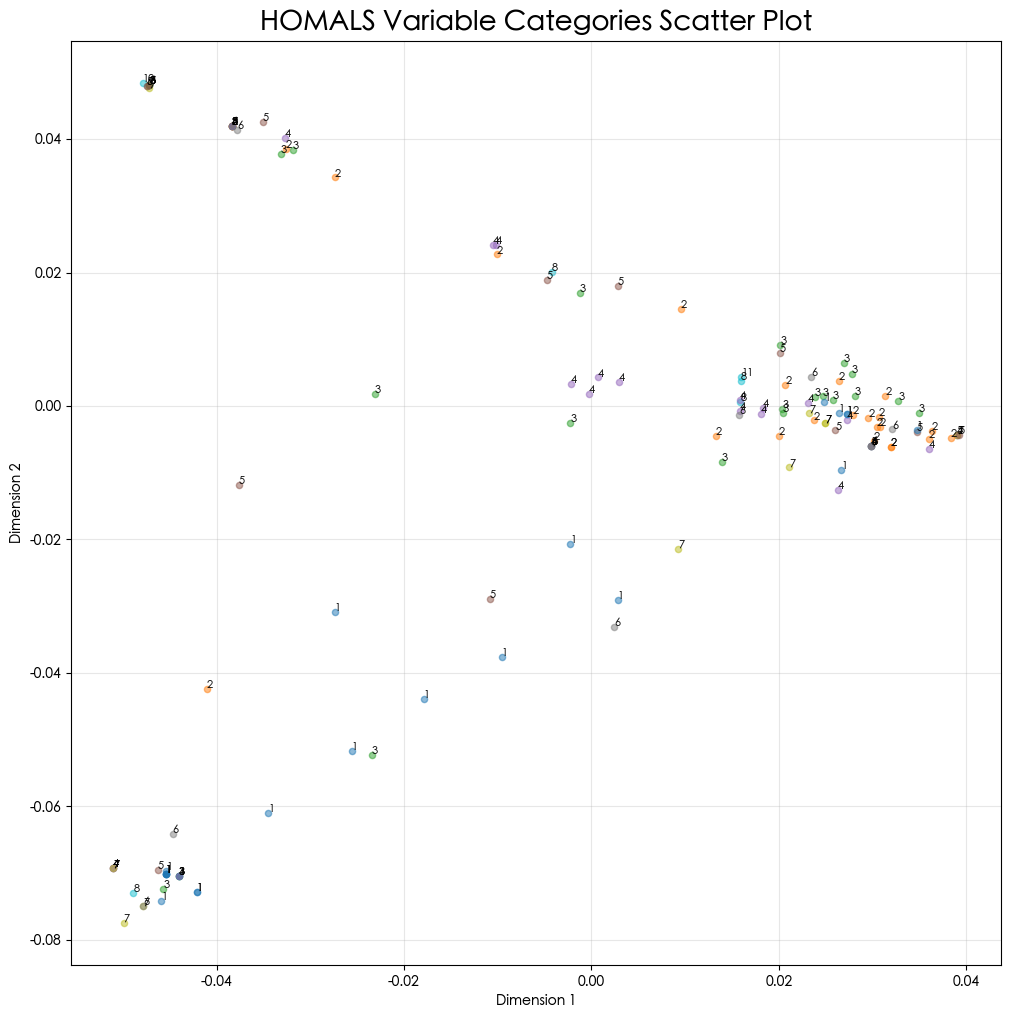

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# 假設 var_labels 是從 1 到 8 的數字標籤，可能是字串類型
num_categories = 8  # 類別數量
colors = cm.get_cmap('tab10', num_categories)  # 你可以選擇不同的 colormap

plt.figure(figsize=(12, 12))

# 用標籤來為每個點選擇顏色
for i, label in enumerate(var_labels):
    # 如果 label 是字串，將其轉換為整數
    label_int = int(label) if isinstance(label, str) else label
    plt.scatter(var_coord[i, 0], var_coord[i, 1], 
                s=20, alpha=0.5, color=colors(label_int-1))  # label-1 是因為從 1 開始

# 標註文字
for i, label in enumerate(var_labels):
    plt.text(var_coord[i, 0], var_coord[i, 1], label,
             fontsize=8, alpha=0.9)

# 添加標題與標籤
plt.title("HOMALS Variable Categories Scatter Plot", fontsize=20)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True, alpha=0.3)

# 顯示圖形
plt.show()


- 下面的程式碼是我用來隨機挑選看看有沒有很像的兩人


抽到的 3 位學生：
 ['子欣', '鈞磊', '本豫'] 



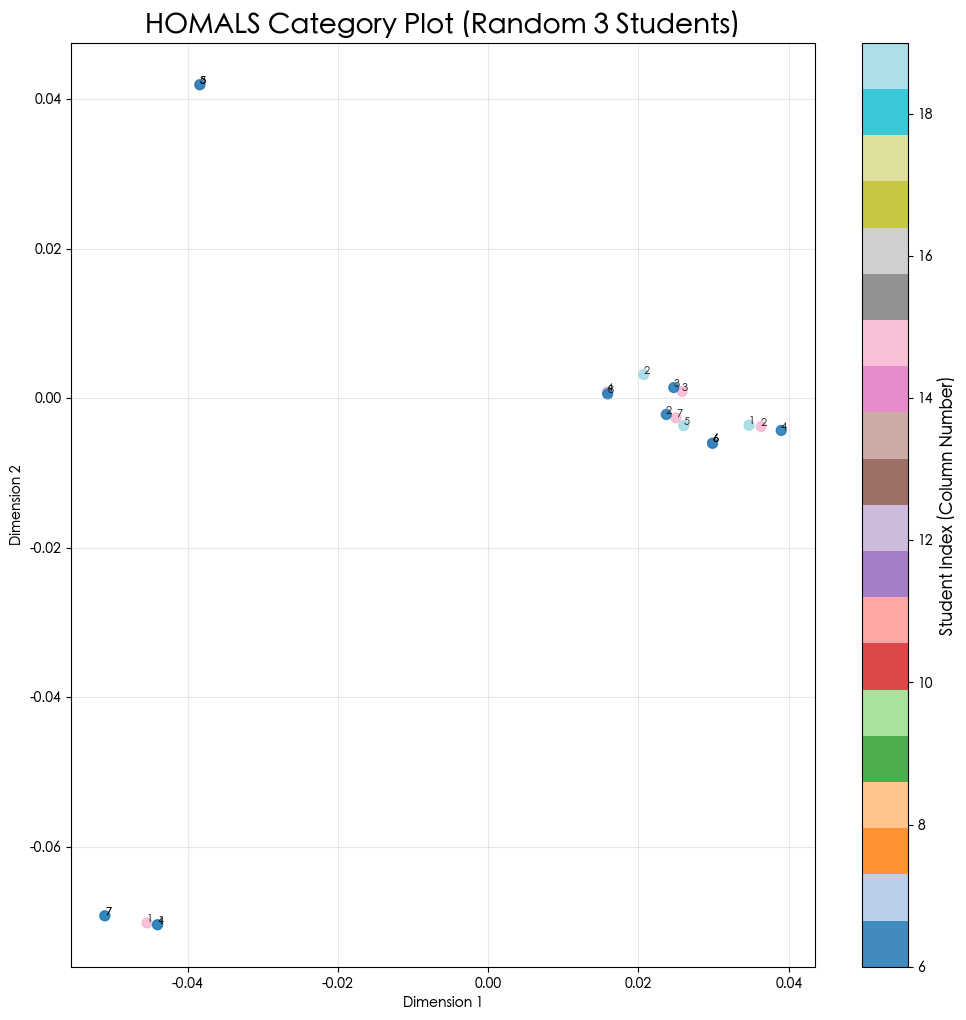


選到的 3 位學生的原始資料
    子欣  鈞磊  本豫
0    4   1   1
1    1   2   2
2    2   3   3
3    2   4   2
4    1   2   4
5    3   5   5
6    6   6   6
7    2   3   3
8    3   5   5
9    3   5   5
10   2   4   2
11   3   5   5
12   5   3   3
13   1   2   2
14   7   1   7
15   5   3   3
16   2   3   3
17   3   5   5
18   5   3   3
19   2   3   3
20   1   2   4
21   1   2   4
22   4   1   1
23   6   6   6
24   3   5   5
25   2   4   3
26   3   5   5
27   2   4   8
28   1   7   2
29   5   3   3
30   4   1   1
31   3   5   5
32   1   2   4
33   4   1   1
34   3   5   5

選到的 3 位學生的 unique 類別

子欣 的類別：
[4 1 2 3 6 5 7]

鈞磊 的類別：
[1 2 3 4 5 6 7]

本豫 的類別：
[1 2 3 4 5 6 7 8]


In [76]:
import matplotlib.pyplot as plt
import numpy as np
import random


NUMBER_STUDENTS = 3


# Step 0：資料區（移除動物名稱）
df_no_animal = df.iloc[:, 1:]    

# 安全檢查
if NUMBER_STUDENTS > df_no_animal.shape[1]:
    raise ValueError("NUMBER_STUDENTS 超過學生欄位數！")

# Step 1：隨機抽 NUMBER_STUDENTS 位學生
selected_cols = random.sample(list(df_no_animal.columns), NUMBER_STUDENTS)
print(f"\n抽到的 {NUMBER_STUDENTS} 位學生：\n", selected_cols, "\n")

# Step 2：建立所有欄位的類別數
column_category_counts = [
    df_no_animal[col].nunique() for col in df_no_animal.columns
]

# Step 3：建立每欄位在 var_coord 中的 index 範圍
col_ranges = []
cur = 0
for cnt in column_category_counts:
    col_ranges.append(range(cur, cur + cnt))
    cur += cnt

# Step 4：從 var_coord 中篩出指定學生的類別座標
selected_var_indices = []
selected_student_index = []
all_columns = list(df_no_animal.columns)

for col in selected_cols:
    idx = all_columns.index(col)  # 學生欄位在 df 的順序
    rng = col_ranges[idx]         # 該欄位對應的類別 index
    selected_var_indices.extend(rng)
    selected_student_index.extend([idx] * len(rng))

selected_var_indices = np.array(selected_var_indices)
selected_student_index = np.array(selected_student_index)

# Step 5：取出座標與類別標籤
plot_coord = var_coord[selected_var_indices]
plot_labels = [var_labels[i] for i in selected_var_indices]

# Step 6：畫圖
plt.figure(figsize=(12, 12))
scatter = plt.scatter(
    plot_coord[:, 0],
    plot_coord[:, 1],
    c=selected_student_index,
    cmap="tab20",
    s=50,
    alpha=0.85
)

# 類別文字標示
for i, label in enumerate(plot_labels):
    plt.text(
        plot_coord[i, 0],
        plot_coord[i, 1],
        label,
        fontsize=8,
        alpha=0.8
    )

plt.title(f"HOMALS Category Plot (Random {NUMBER_STUDENTS} Students)", fontsize=20)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(alpha=0.3)

# 色階
cbar = plt.colorbar(scatter)
cbar.set_label("Student Index (Column Number)", fontsize=12)

plt.show()

# -----------------------------------------------------
# 印出原始欄位資料（供檢查）
# -----------------------------------------------------

print("\n==============================")
print(f"選到的 {NUMBER_STUDENTS} 位學生的原始資料")
print("==============================")
print(df_no_animal[selected_cols])

print("\n==============================")
print(f"選到的 {NUMBER_STUDENTS} 位學生的 unique 類別")
print("==============================")

for col in selected_cols:
    print(f"\n{col} 的類別：")
    print(df_no_animal[col].unique())


- 這邊是我把很像的兩個人做圖出來看看

繪圖的學生： ['子欣', '本豫']


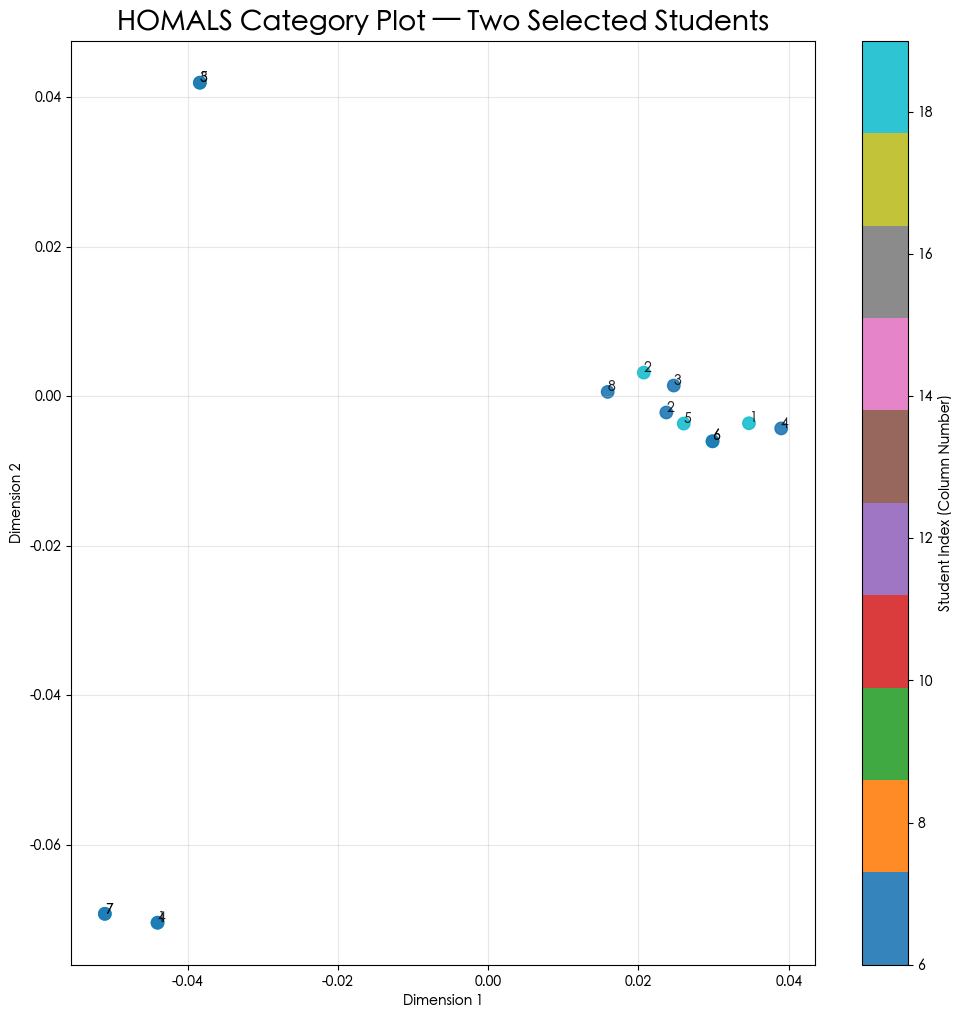


原始資料：指定學生的欄位
    子欣  本豫
0    4   1
1    1   2
2    2   3
3    2   2
4    1   4
5    3   5
6    6   6
7    2   3
8    3   5
9    3   5
10   2   2
11   3   5
12   5   3
13   1   2
14   7   7
15   5   3
16   2   3
17   3   5
18   5   3
19   2   3
20   1   4
21   1   4
22   4   1
23   6   6
24   3   5
25   2   3
26   3   5
27   2   8
28   1   2
29   5   3
30   4   1
31   3   5
32   1   4
33   4   1
34   3   5

指定學生的 unique 類別：
子欣:
[4 1 2 3 6 5 7]

本豫:
[1 2 3 4 5 6 7 8]



In [78]:
import matplotlib.pyplot as plt
import numpy as np

# 指定要畫的兩位學生
selected_cols = ['子欣', '本豫'] 

# Step 0：資料（移除動物名稱）
df_no_animal = df.iloc[:, 1:]

# 基本檢查
for col in selected_cols:
    if col not in df_no_animal.columns:
        raise ValueError(f"找不到欄位: {col}")

print("繪圖的學生：", selected_cols)

# Step 1：計算全部欄位的類別數
column_category_counts = [df_no_animal[col].nunique() for col in df_no_animal.columns]

# Step 2：決定每個欄位在 var_coord 的索引區間
col_ranges = []
cur = 0
for cnt in column_category_counts:
    col_ranges.append(range(cur, cur + cnt))
    cur += cnt

all_columns = list(df_no_animal.columns)

# Step 3：收集這兩個學生的類別 index
selected_var_indices = []
selected_student_index = []

for col in selected_cols:
    idx = all_columns.index(col)   # 在 df 中的欄位順序
    rng = col_ranges[idx]          # 對應 var_coord 的 index
    selected_var_indices.extend(rng)
    selected_student_index.extend([idx] * len(rng))

selected_var_indices = np.array(selected_var_indices)
selected_student_index = np.array(selected_student_index)

# Step 4：取出座標與標籤
plot_coord = var_coord[selected_var_indices]
plot_labels = [var_labels[i] for i in selected_var_indices]

# Step 5：繪圖
plt.figure(figsize=(12, 12))
scatter = plt.scatter(
    plot_coord[:, 0],
    plot_coord[:, 1],
    c=selected_student_index,
    cmap="tab10",
    s=80,
    alpha=0.9
)

# 標記文字
for i, label in enumerate(plot_labels):
    plt.text(
        plot_coord[i, 0],
        plot_coord[i, 1],
        label,
        fontsize=10,
        alpha=0.85
    )

plt.title("HOMALS Category Plot — Two Selected Students", fontsize=20)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(alpha=0.3)

cbar = plt.colorbar(scatter)
cbar.set_label("Student Index (Column Number)")

plt.show()

# Step 6：印出原始資料
print("\n原始資料：指定學生的欄位")
print(df_no_animal[selected_cols])

print("\n指定學生的 unique 類別：")
for col in selected_cols:
    print(f"{col}:")
    print(df_no_animal[col].unique())
    print()


繪圖的學生： ['品薰', '宥任']


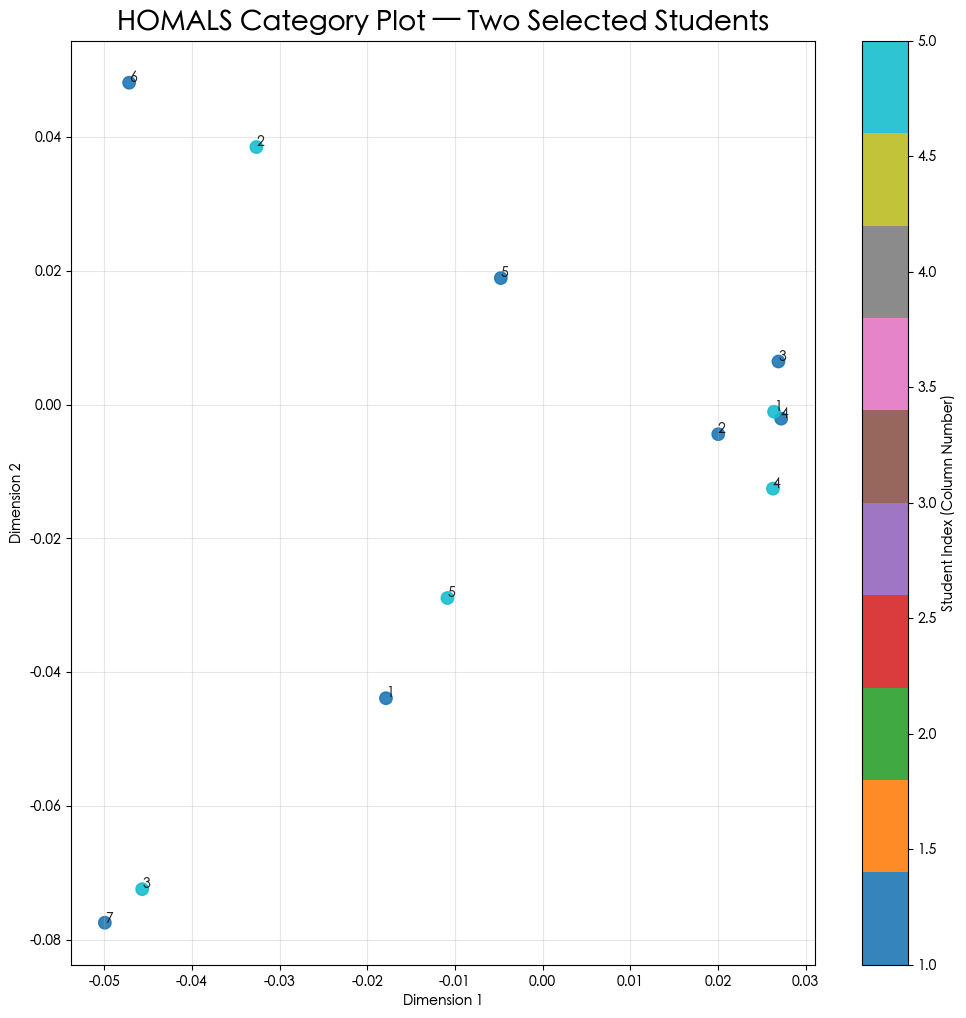


原始資料：指定學生的欄位
    品薰  宥任
0    1   4
1    2   4
2    3   1
3    4   5
4    4   4
5    5   2
6    2   4
7    5   1
8    6   2
9    6   2
10   4   5
11   5   2
12   2   1
13   4   4
14   1   5
15   2   1
16   2   2
17   6   2
18   1   1
19   2   1
20   4   4
21   2   4
22   7   5
23   2   1
24   2   2
25   5   5
26   6   2
27   5   5
28   2   1
29   1   1
30   2   3
31   6   2
32   2   4
33   1   5
34   5   2

指定學生的 unique 類別：
品薰:
[1 2 3 4 5 6 7]

宥任:
[4 1 5 2 3]



In [75]:
import matplotlib.pyplot as plt
import numpy as np

# 指定要畫的兩位學生
selected_cols = [ '品薰', '宥任'] 

# Step 0：資料（移除動物名稱）
df_no_animal = df.iloc[:, 1:]

# 基本檢查
for col in selected_cols:
    if col not in df_no_animal.columns:
        raise ValueError(f"找不到欄位: {col}")

print("繪圖的學生：", selected_cols)

# Step 1：計算全部欄位的類別數
column_category_counts = [df_no_animal[col].nunique() for col in df_no_animal.columns]

# Step 2：決定每個欄位在 var_coord 的索引區間
col_ranges = []
cur = 0
for cnt in column_category_counts:
    col_ranges.append(range(cur, cur + cnt))
    cur += cnt

all_columns = list(df_no_animal.columns)

# Step 3：收集這兩個學生的類別 index
selected_var_indices = []
selected_student_index = []

for col in selected_cols:
    idx = all_columns.index(col)   # 在 df 中的欄位順序
    rng = col_ranges[idx]          # 對應 var_coord 的 index
    selected_var_indices.extend(rng)
    selected_student_index.extend([idx] * len(rng))

selected_var_indices = np.array(selected_var_indices)
selected_student_index = np.array(selected_student_index)

# Step 4：取出座標與標籤
plot_coord = var_coord[selected_var_indices]
plot_labels = [var_labels[i] for i in selected_var_indices]

# Step 5：繪圖
plt.figure(figsize=(12, 12))
scatter = plt.scatter(
    plot_coord[:, 0],
    plot_coord[:, 1],
    c=selected_student_index,
    cmap="tab10",
    s=80,
    alpha=0.9
)

# 標記文字
for i, label in enumerate(plot_labels):
    plt.text(
        plot_coord[i, 0],
        plot_coord[i, 1],
        label,
        fontsize=10,
        alpha=0.85
    )

plt.title("HOMALS Category Plot — Two Selected Students", fontsize=20)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(alpha=0.3)

cbar = plt.colorbar(scatter)
cbar.set_label("Student Index (Column Number)")

plt.show()

# Step 6：印出原始資料
print("\n原始資料：指定學生的欄位")
print(df_no_animal[selected_cols])

print("\n指定學生的 unique 類別：")
for col in selected_cols:
    print(f"{col}:")
    print(df_no_animal[col].unique())
    print()


- 這邊有體現出haomals的強大用處 他是用來計算關聯性，雖然兩筆資料看似差很多但是那是因為他們取分類的關係不然（實際上是一樣的）

<hr>

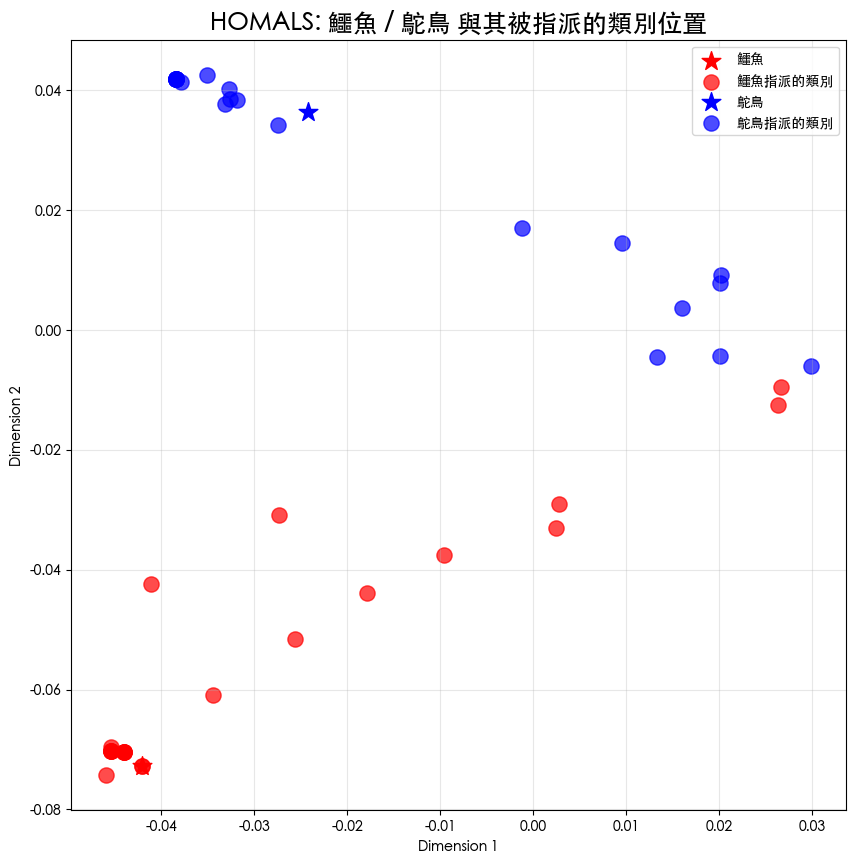

In [79]:
import matplotlib.pyplot as plt
import numpy as np


# 1. 找到鱷魚 / 鴕鳥的 index

idx_alligator = [i for i, x in enumerate(animal_labels) if "鱷魚" in x][0]
idx_ostrich   = [i for i, x in enumerate(animal_labels) if "鴕鳥" in x][0]


# 2. 找出每位同學對鱷魚與鴕鳥的類別（數字: 1,2,3,...）

alligator_cats = df_no_animal.iloc[idx_alligator].values
ostrich_cats   = df_no_animal.iloc[idx_ostrich].values


# 3. 類別 → var_coord 的 index

# 計算每欄位有多少類別
col_unique_counts = [df_no_animal[col].nunique() for col in df_no_animal.columns]

# 每欄變數對應的 var_coord 區間
col_ranges = []
cur = 0
for cnt in col_unique_counts:
    col_ranges.append(range(cur, cur + cnt))
    cur += cnt

# 將「類別號碼」轉成對應 var_coord 的 index
def cat_to_var_index(col_idx, cat_value):
    return col_ranges[col_idx][cat_value - 1]

alligator_var_idx = [
    cat_to_var_index(j, c) for j, c in enumerate(alligator_cats)
]

ostrich_var_idx = [
    cat_to_var_index(j, c) for j, c in enumerate(ostrich_cats)
]


# 4. 畫圖：只畫鱷魚/鴕鳥與其類別位置

plt.figure(figsize=(10,10))

# ===== 鱷魚 =====
plt.scatter(
    animal_coord[idx_alligator,0], animal_coord[idx_alligator,1],
    s=200, c="red", marker="*", label="鱷魚"
)
plt.scatter(
    var_coord[alligator_var_idx,0], var_coord[alligator_var_idx,1],
    s=120, c="red", alpha=0.7, label="鱷魚指派的類別"
)

# ===== 鴕鳥 =====
plt.scatter(
    animal_coord[idx_ostrich,0], animal_coord[idx_ostrich,1],
    s=200, c="blue", marker="*", label="鴕鳥"
)
plt.scatter(
    var_coord[ostrich_var_idx,0], var_coord[ostrich_var_idx,1],
    s=120, c="blue", alpha=0.7, label="鴕鳥指派的類別"
)

plt.title("HOMALS: 鱷魚 / 鴕鳥 與其被指派的類別位置", fontsize=18)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [81]:
print("同學人數 =", len(df_no_animal.columns))
print("鱷魚的紅色點數 =", len(alligator_var_idx))
print("鴕鳥的藍色點數 =", len(ostrich_var_idx))


同學人數 = 24
鱷魚的紅色點數 = 24
鴕鳥的藍色點數 = 24


- 我感覺還算是符合，這是我的猜測dim2多少有一點有沒有翅膀的成分在其中
- 其實這張圖比較像有三種可以選在右邊中間大概(x = 0.02 , y = 0)，感覺也蠻多人選這組的

<hr>

 [1] 0.0166085522 0.0155087693 0.0094709168 0.0083619981 0.0084051494
 [6] 0.0061794526 0.0056671589 0.0043955236 0.0038951696 0.0035734604
[11] 0.0031450769 0.0026865188 0.0022653707 0.0019789483 0.0017765828
[16] 0.0014172713 0.0013005246 0.0012263805 0.0010334008 0.0009205338
[21] 0.0006793340 0.0006025172 0.0005087740 0.0004359651 0.0004534890
[26] 0.0003880795 0.0003589526 0.0002644409 0.0001707728 0.0001333668
Eigenvalues length = 30
[0.01660855 0.01550877 0.00947092 0.008362   0.00840515 0.00617945
 0.00566716 0.00439552 0.00389517 0.00357346 0.00314508 0.00268652
 0.00226537 0.00197895 0.00177658 0.00141727 0.00130052 0.00122638
 0.0010334  0.00092053 0.00067933 0.00060252 0.00050877 0.00043597
 0.00045349 0.00038808 0.00035895 0.00026444 0.00017077 0.00013337]


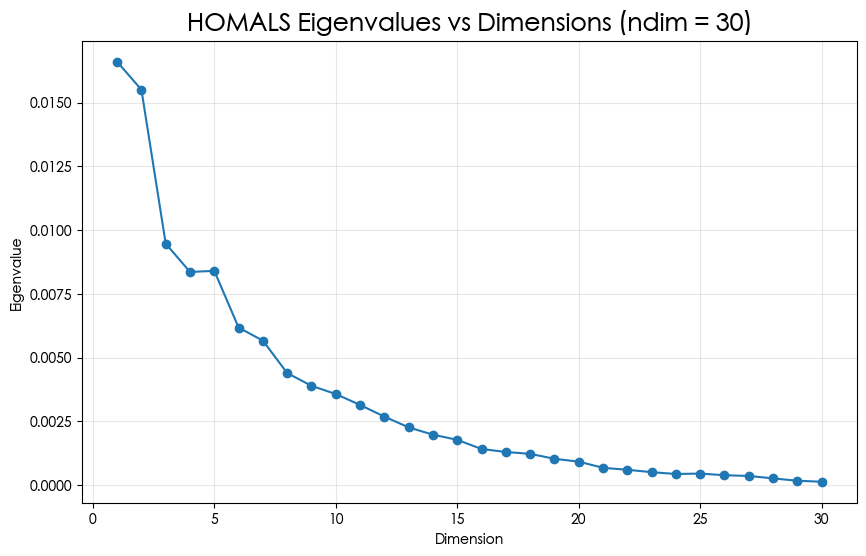

In [115]:
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects import pandas2ri
pandas2ri.activate()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

# 1. 讀取資料
df = pd.read_csv("hw2_data_animals.csv")
ro.globalenv["df"] = pandas2ri.py2rpy(df)

# 2. R HOMALS（30 維）
r_code = """
if (!require(Gifi)) install.packages('Gifi')
library(Gifi)

animals <- df$動物名稱
X <- df[, -1]

for(i in 1:ncol(X)){ 
  X[,i] <- as.factor(X[,i])
}

h <- homals(X, ndim=30)

eig <- h$eigenvalues
print(eig)


"""



ro.r(r_code)

# # 3. 取 eigenvalues
eig_r = ro.globalenv["eig"]
eig = np.array(list(eig_r), dtype=float)

print("Eigenvalues length =", len(eig))
print(eig)


# 4. 畫圖
plt.figure(figsize=(10,6))
plt.plot(range(1, len(eig)+1), eig, marker='o')
plt.title("HOMALS Eigenvalues vs Dimensions (ndim = 30)", fontsize=18)
plt.xlabel("Dimension")
plt.ylabel("Eigenvalue")
plt.grid(alpha=0.3)
plt.show()


- 可以發現他確實有變平坦

In [116]:
total = eig.sum()
explained = eig / total
cumulative = np.cumsum(explained)

# 印出前 30 維的解釋
print("\n=== HOMALS Dimensions Explained ===")
for i in range(len(eig)):
    print(f"Dim {i+1:2d}: eigenvalue = {eig[i]:.4f}  \
           explained = {explained[i]*100:.2f}%  \
              cumulative = {cumulative[i]*100:.2f}%")


=== HOMALS Dimensions Explained ===
Dim  1: eigenvalue = 0.0166             explained = 16.00%                cumulative = 16.00%
Dim  2: eigenvalue = 0.0155             explained = 14.94%                cumulative = 30.94%
Dim  3: eigenvalue = 0.0095             explained = 9.12%                cumulative = 40.06%
Dim  4: eigenvalue = 0.0084             explained = 8.05%                cumulative = 48.12%
Dim  5: eigenvalue = 0.0084             explained = 8.10%                cumulative = 56.21%
Dim  6: eigenvalue = 0.0062             explained = 5.95%                cumulative = 62.16%
Dim  7: eigenvalue = 0.0057             explained = 5.46%                cumulative = 67.62%
Dim  8: eigenvalue = 0.0044             explained = 4.23%                cumulative = 71.86%
Dim  9: eigenvalue = 0.0039             explained = 3.75%                cumulative = 75.61%
Dim 10: eigenvalue = 0.0036             explained = 3.44%                cumulative = 79.05%
Dim 11: eigenvalue = 0.0031    

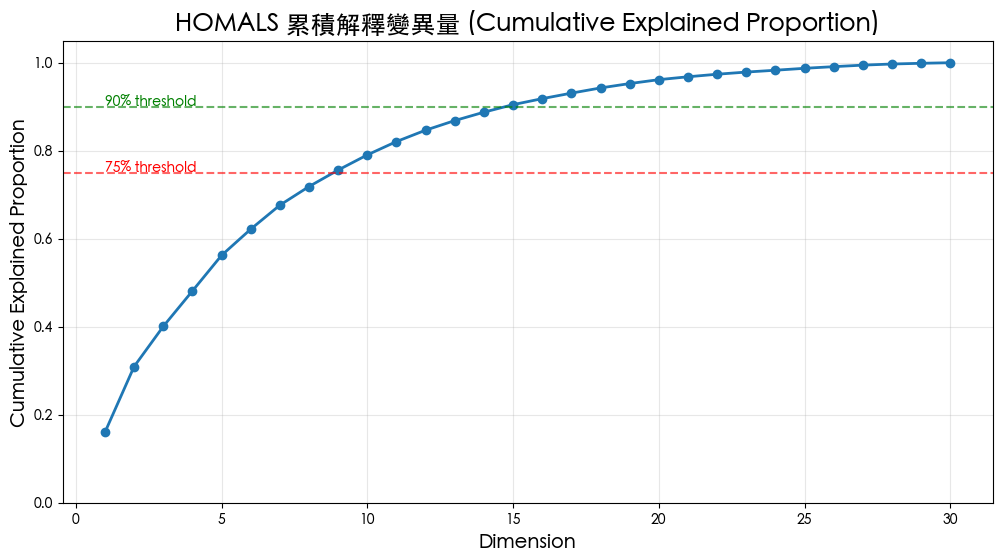

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# 計算解釋量
total = eig.sum()
explained = eig / total
cumulative = np.cumsum(explained)

# 畫圖
plt.figure(figsize=(12,6))
plt.plot(range(1, len(eig)+1), cumulative, marker='o', linewidth=2)

# 加輔助線（75%、90%）
plt.axhline(0.75, color='red', linestyle='--', alpha=0.6)
plt.axhline(0.90, color='green', linestyle='--', alpha=0.6)

plt.text(1, 0.75, "75% threshold", color='red')
plt.text(1, 0.90, "90% threshold", color='green')

plt.title("HOMALS 累積解釋變異量 (Cumulative Explained Proportion)", fontsize=18)
plt.xlabel("Dimension", fontsize=14)
plt.ylabel("Cumulative Explained Proportion", fontsize=14)
plt.grid(alpha=0.3)
plt.ylim(0, 1.05)
plt.show()


In [124]:

# 讀取資料
df = pd.read_csv("hw2_data_animals.csv")
ro.globalenv["df"] = pandas2ri.py2rpy(df)

# --- R: HOMALS 做 30 維 ---
r_code = """
if (!require(Gifi)) install.packages('Gifi')
library(Gifi)

animals <- df$動物名稱
X <- df[, -1]

# 轉 factor
for(i in 1:ncol(X)){
  X[,i] <- as.factor(X[,i])
}

# HOMALS  30 維
h <- homals(X, ndim=30)

animal_coord_30 <- h$objscores
"""

ro.r(r_code)

# 抓 30 維座標
animal_coord_30 = np.array(ro.globalenv["animal_coord_30"])
animal_labels   = list(ro.globalenv["animals"])

print("animal_coord_30 shape =", animal_coord_30.shape)  # (35, 30)

# --- 取前 20 維 ---
animal_coord_20 = animal_coord_30[:, :20]
print("Use first 20 dims for clustering:", animal_coord_20.shape)


animal_coord_30 shape = (35, 30)
Use first 20 dims for clustering: (35, 20)


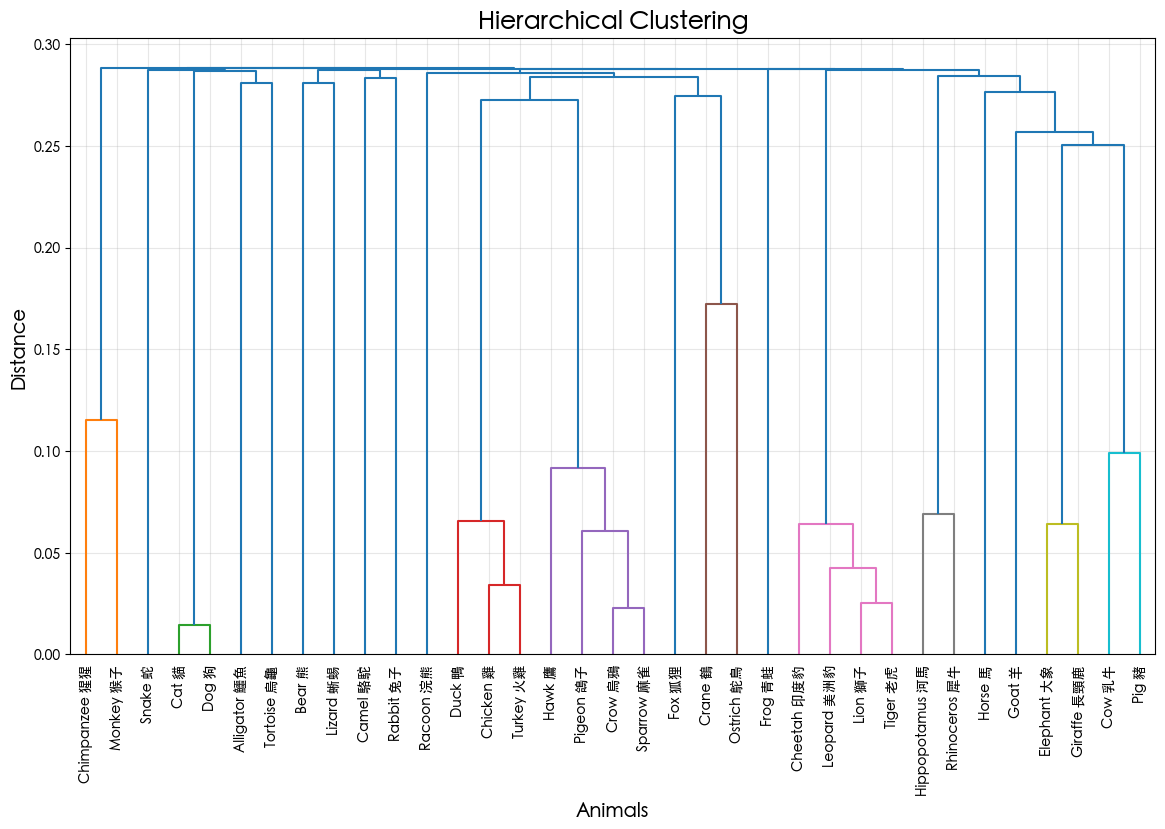

In [125]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Ward linkage
Z = linkage(animal_coord_20, method='ward')
plt.figure(figsize=(14, 8))

dendrogram(
    Z,
    labels=animal_labels,
    leaf_rotation=90,
    leaf_font_size=10
)

plt.title("Hierarchical Clustering", fontsize=18)
plt.xlabel("Animals", fontsize=14)
plt.ylabel("Distance", fontsize=14)
plt.grid(alpha=0.3)

plt.show()


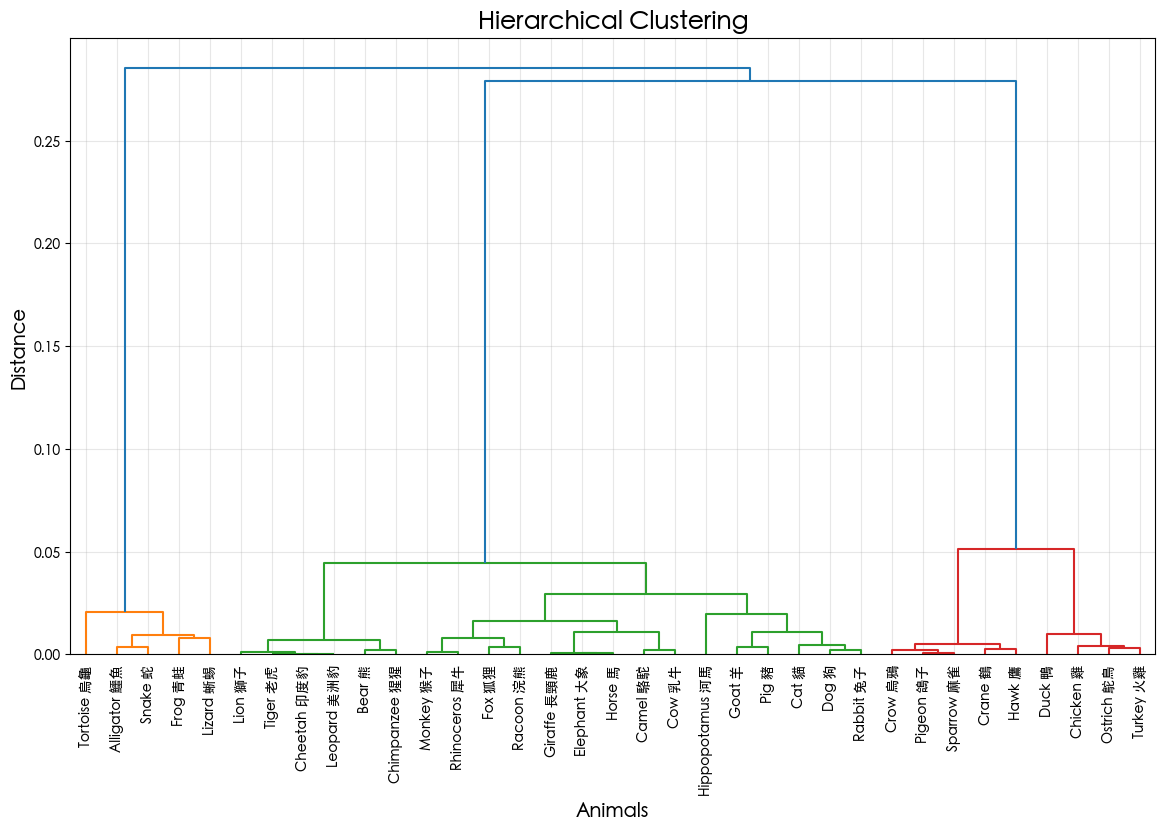

In [126]:
animal_coord_20 = animal_coord_30[:, :2]

# Ward linkage
Z = linkage(animal_coord_20, method='ward')
plt.figure(figsize=(14, 8))

dendrogram(
    Z,
    labels=animal_labels,
    leaf_rotation=90,
    leaf_font_size=10
)

plt.title("Hierarchical Clustering", fontsize=18)
plt.xlabel("Animals", fontsize=14)
plt.ylabel("Distance", fontsize=14)
plt.grid(alpha=0.3)

plt.show()


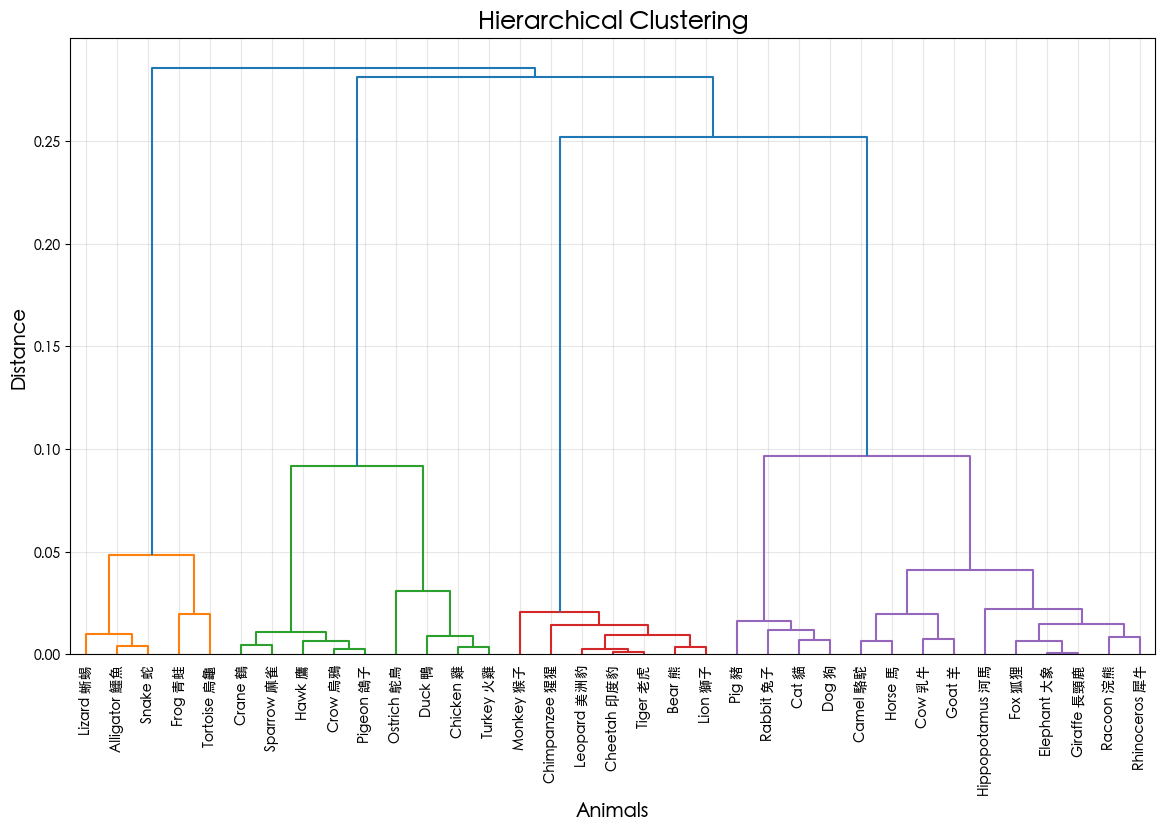

In [127]:
animal_coord_20 = animal_coord_30[:, :3]

# Ward linkage
Z = linkage(animal_coord_20, method='ward')
plt.figure(figsize=(14, 8))

dendrogram(
    Z,
    labels=animal_labels,
    leaf_rotation=90,
    leaf_font_size=10
)

plt.title("Hierarchical Clustering", fontsize=18)
plt.xlabel("Animals", fontsize=14)
plt.ylabel("Distance", fontsize=14)
plt.grid(alpha=0.3)

plt.show()


- 我覺得20為太多了，雖然他可以分得比較細，但是相對的他會出現我覺得算是overfitting的狀況
- 我是覺得差不堆兩三個其實效果就還不錯
- 但也可以看到20個的時候裡面的被分在同一組的確實以常識來說是很像的東西

In [129]:
animal_coord_30 = np.array(ro.globalenv["animal_coord_30"])  # shape = (35, 30)

variances = np.var(animal_coord_30, axis=0)

for i, v in enumerate(variances, start=1):
    print(f"Dim {i:2d} variance = {v:.6f}")

print("是否所有維度變異相同？", np.allclose(variances, variances[0]))


Dim  1 variance = 0.001190
Dim  2 variance = 0.001190
Dim  3 variance = 0.001190
Dim  4 variance = 0.001190
Dim  5 variance = 0.001190
Dim  6 variance = 0.001190
Dim  7 variance = 0.001190
Dim  8 variance = 0.001190
Dim  9 variance = 0.001190
Dim 10 variance = 0.001190
Dim 11 variance = 0.001190
Dim 12 variance = 0.001190
Dim 13 variance = 0.001190
Dim 14 variance = 0.001190
Dim 15 variance = 0.001190
Dim 16 variance = 0.001190
Dim 17 variance = 0.001190
Dim 18 variance = 0.001190
Dim 19 variance = 0.001190
Dim 20 variance = 0.001190
Dim 21 variance = 0.001190
Dim 22 variance = 0.001190
Dim 23 variance = 0.001190
Dim 24 variance = 0.001190
Dim 25 variance = 0.001190
Dim 26 variance = 0.001190
Dim 27 variance = 0.001190
Dim 28 variance = 0.001190
Dim 29 variance = 0.001190
Dim 30 variance = 0.001190
是否所有維度變異相同？ True


- 他們確實會一樣，這樣的設定感覺是合理的，不要讓某一軸特別突出

##### 根據 c. 的檢查結果，你認為我們是否應該進一步調整動物的HOMALS 座標於每個維度的變異，並且以調整後的座標做群聚分析？說明你的看法。

- 我認為不應該再去做更改，因為這可以避免其中一軸的特別突出，這樣尺度不同，差距會被放大

##### iii

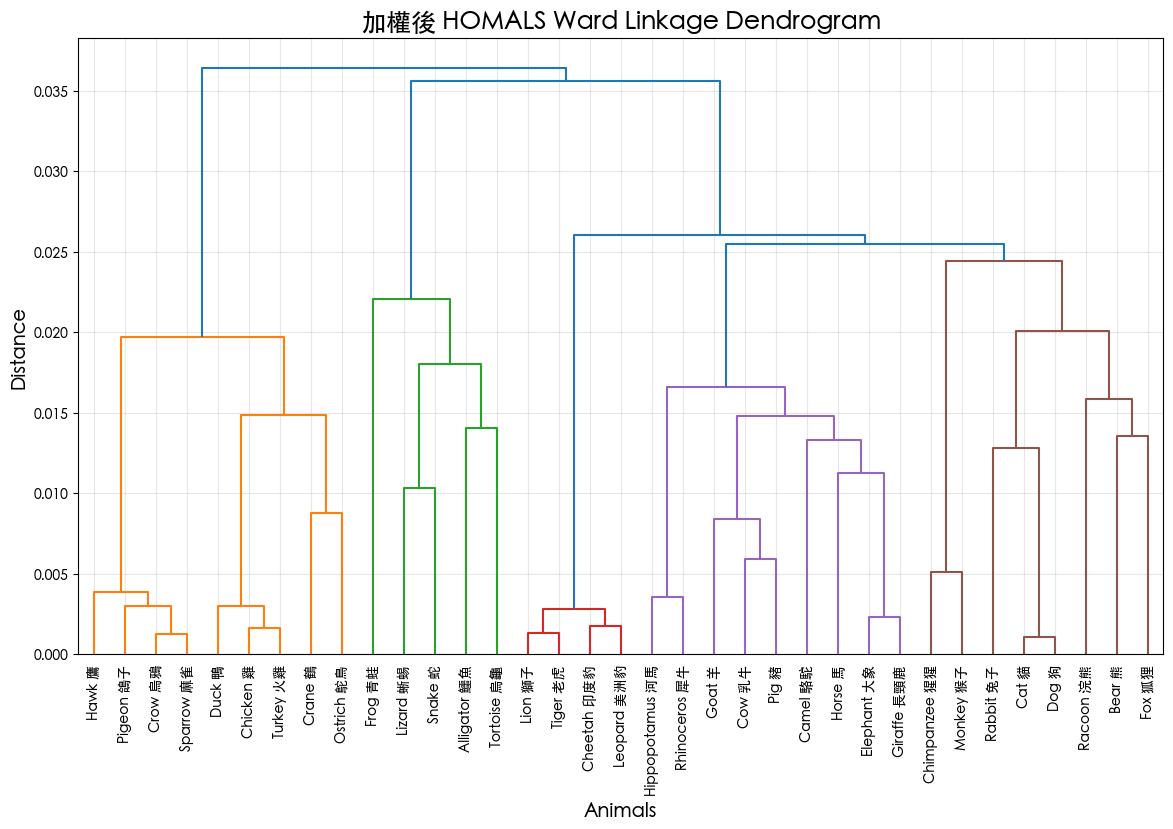

In [130]:
df = pd.read_csv("hw2_data_animals.csv")
ro.globalenv["df"] = pandas2ri.py2rpy(df)

# --- R：HOMALS 30 維 ---
r_code = """
if (!require(Gifi)) install.packages('Gifi')
library(Gifi)

animals <- df$動物名稱
X <- df[, -1]

for(i in 1:ncol(X)){
  X[,i] <- as.factor(X[,i])
}

h <- homals(X, ndim=30)

hhx <- h$objscores
eig <- h$eigenvalues
"""

ro.r(r_code)

# 從 R 抓資料
hhx_30 = np.array(ro.globalenv["hhx"])           # 35 × 30
eigenvalues = np.array(ro.globalenv["eig"])      # 30 維 eigenvalues
animal_labels = list(ro.globalenv["animals"])

p = 20  # 只取前 20 維

hhx_20 = hhx_30[:, :p]                 # 35 × 20
eig_20 = eigenvalues[:p]               # 前 20 個 eigenvalues
weights = np.sqrt(eig_20)              # sqrt(eigenvalue)

# Python broadcast 等於 R 的 sweep(hhx, 2, sqrt(e), `*`)
hhx_weighted = hhx_20 * weights

Z = linkage(hhx_weighted, method="ward")

plt.figure(figsize=(14, 8))

dendrogram(
    Z,
    labels=animal_labels,
    leaf_rotation=90,
    leaf_font_size=10
)

plt.title("加權後 HOMALS Ward Linkage Dendrogram", fontsize=18)
plt.xlabel("Animals", fontsize=14)
plt.ylabel("Distance", fontsize=14)
plt.grid(alpha=0.3)
plt.show()




- 我覺得這個和前面的差異在於他會把重要的放大不重要的縮小，所以可以看出哪一些才是影響他最大的部分
- 我會比較喜歡這個，這個可以把我認為還是可以分在同一群的動物分在同一群而不會像上面一樣分太細

In [8]:
import pandas as pd

df = pd.read_csv("DEPRES.DAT", sep=r"\s+", engine="python",
                 header=None, skiprows=1)

df.to_excel("depression.xlsx", index=False)


ParserError: Expected 1 fields in line 3, saw 38. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.